In [43]:
import pandas as pd

file_path = '/Users/dilagurer/Desktop/2019.csv'
df = pd.read_csv(file_path, delimiter=';')

print(df.columns)


Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


In [20]:
import pandas as pd
from sklearn.impute import SimpleImputer

file_path = '/Users/dilagurer/Desktop/2019.csv'
df = pd.read_csv(file_path, delimiter=';')

cols_with_missing_values = ['GDP per capita', 'Social support', 'Healthy life expectancy',
                            'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']

imputer = SimpleImputer(strategy='mean')
df[cols_with_missing_values] = imputer.fit_transform(df[cols_with_missing_values])
print(df.head())



   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.9757568184060904


In [88]:
from sklearn.linear_model import LinearRegression

X = df[['GDP per capita', 'Social support', 'Healthy life expectancy',
        'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']]
y = df['Score']

model = LinearRegression()

model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 1.7952202293072825
Coefficients: [0.77537163 1.12419158 1.07814273 1.45483237 0.97228022 0.48978335]


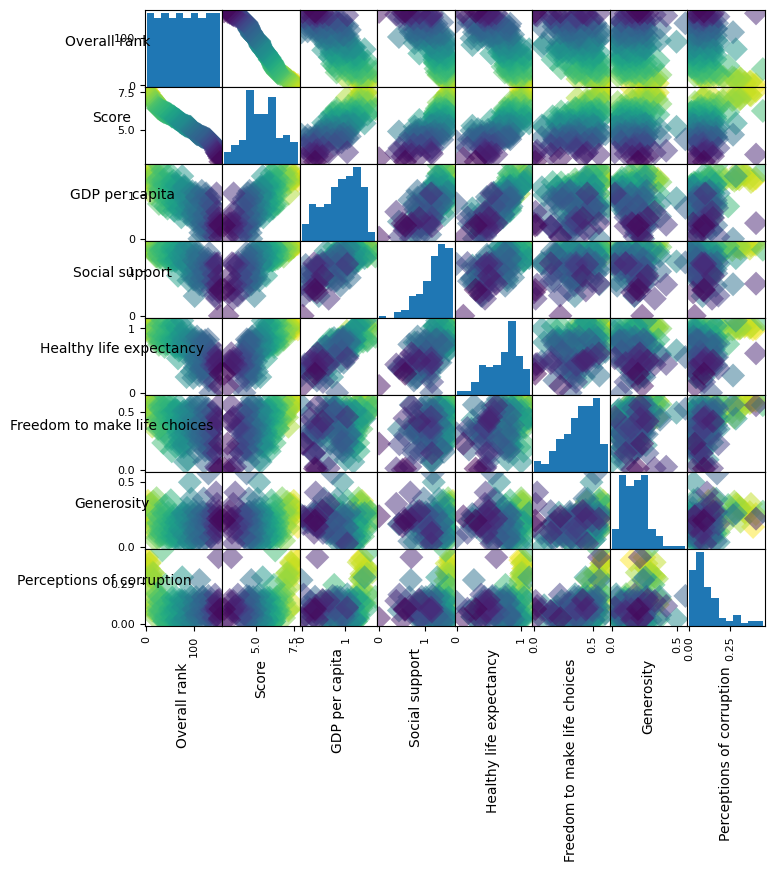

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

scatter_matrix = pd.plotting.scatter_matrix(df, c=y, figsize=[8,8], s=150, marker='D')

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 0)
    
plt.show()


In [92]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)


model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

R^2 Score: 0.7368467575719668


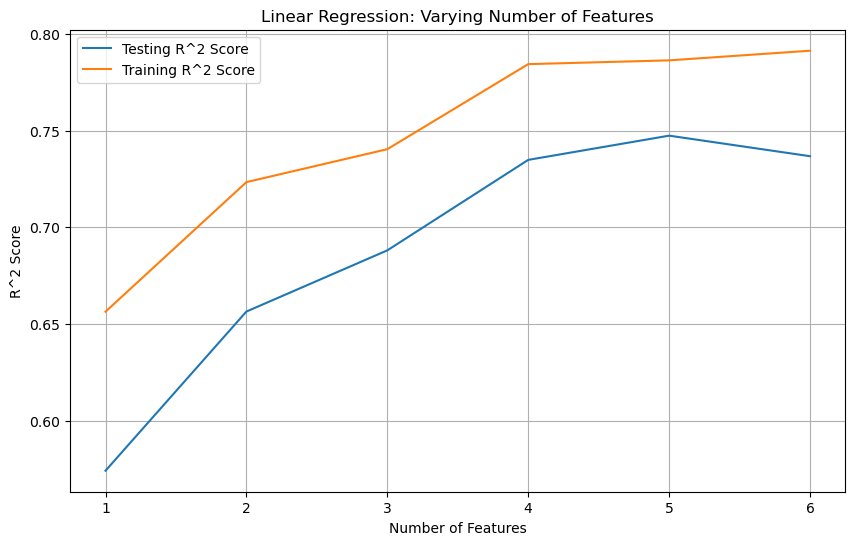

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

num_features = X_train.shape[1]
train_scores = []
test_scores = []


for i in range(1, num_features + 1):
    
    X_train_subset = X_train.iloc[:, :i]
    X_test_subset = X_test.iloc[:, :i]
    
   
    model = LinearRegression()
    
  
    model.fit(X_train_subset, y_train)
    
   
    train_score = model.score(X_train_subset, y_train)
    train_scores.append(train_score)
    
    
    test_score = model.score(X_test_subset, y_test)
    test_scores.append(test_score)


plt.figure(figsize=(10, 6))
plt.plot(range(1, num_features + 1), test_scores, label='Testing R^2 Score')
plt.plot(range(1, num_features + 1), train_scores, label='Training R^2 Score')
plt.xlabel('Number of Features')
plt.ylabel('R^2 Score')
plt.title('Linear Regression: Varying Number of Features')
plt.legend()
plt.grid(True)
plt.show()


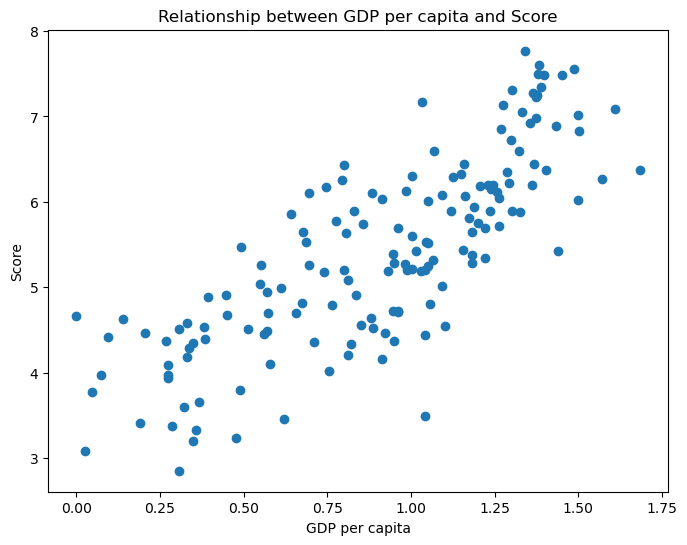

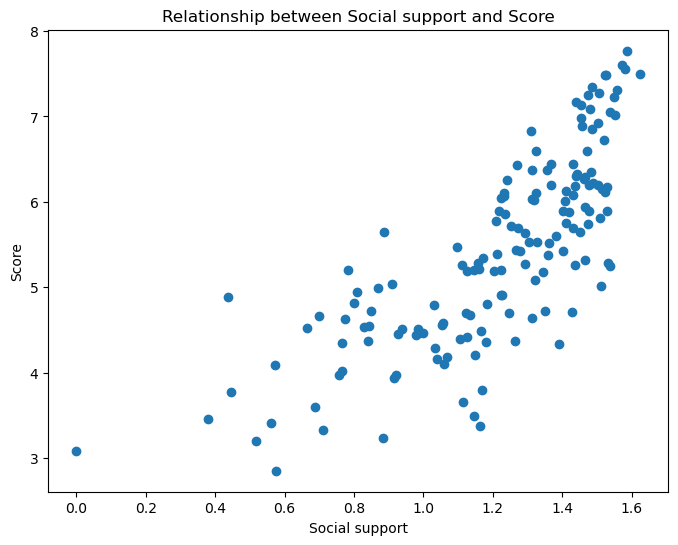

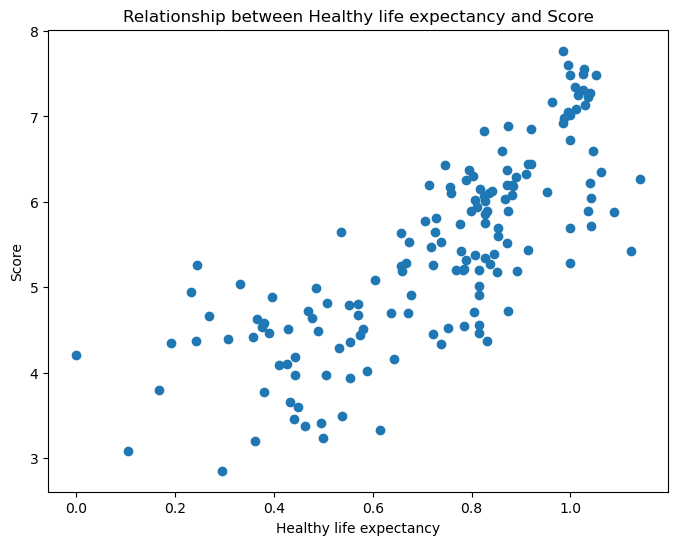

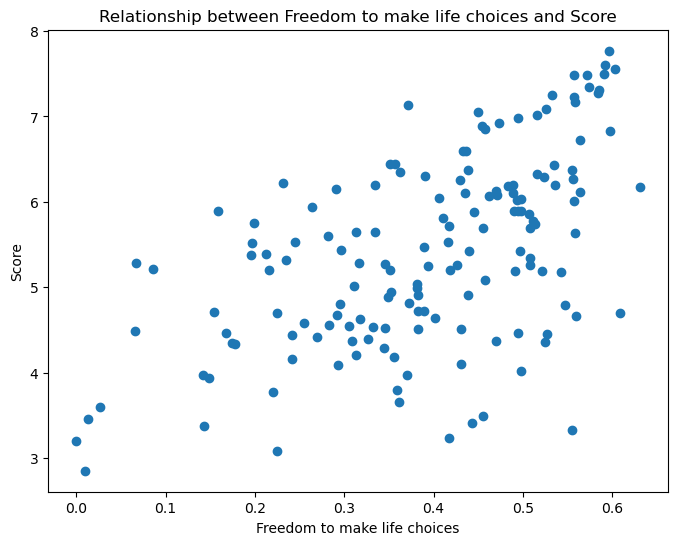

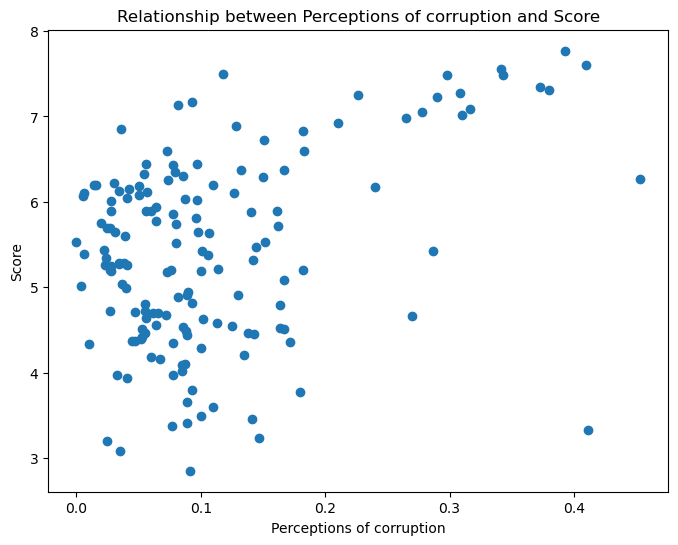

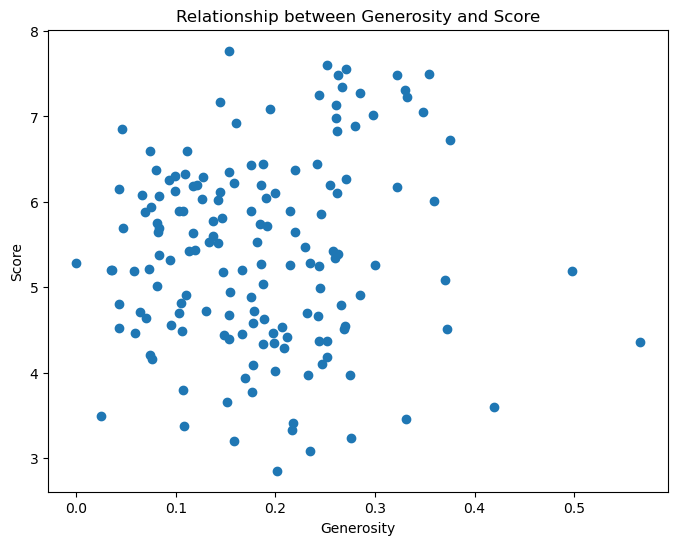

In [27]:
import matplotlib.pyplot as plt


predictor_variables = ['GDP per capita', 'Social support', 'Healthy life expectancy',
                       'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']


for variable in predictor_variables:
   
    X_variable = df[variable]
    y = df['Score']
    
   
    plt.figure(figsize=(8, 6))
    plt.scatter(X_variable, y)
    plt.xlabel(variable)
    plt.ylabel('Score')
    plt.title(f'Relationship between {variable} and Score')
    plt.show()


/Users/dilagurer/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


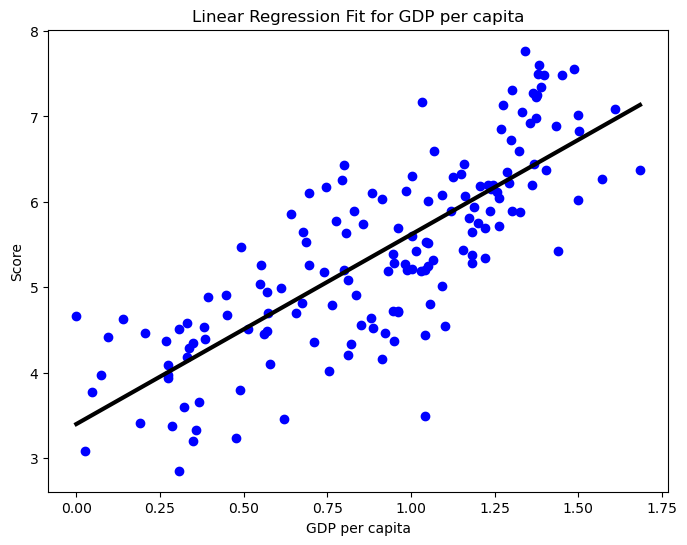

/Users/dilagurer/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


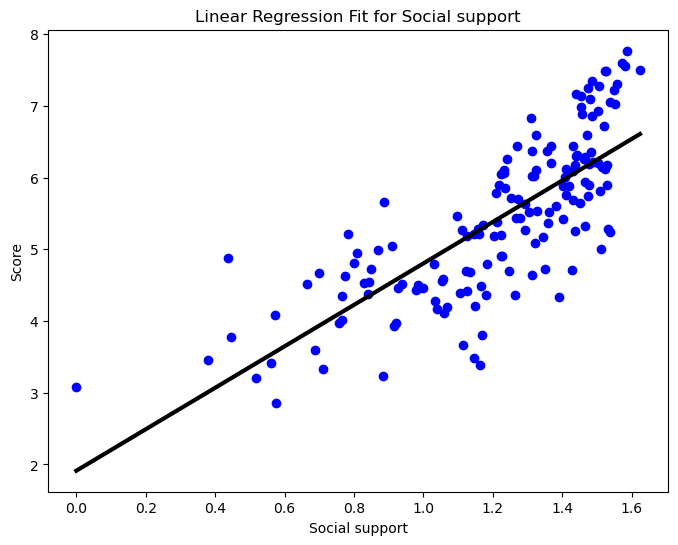

/Users/dilagurer/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


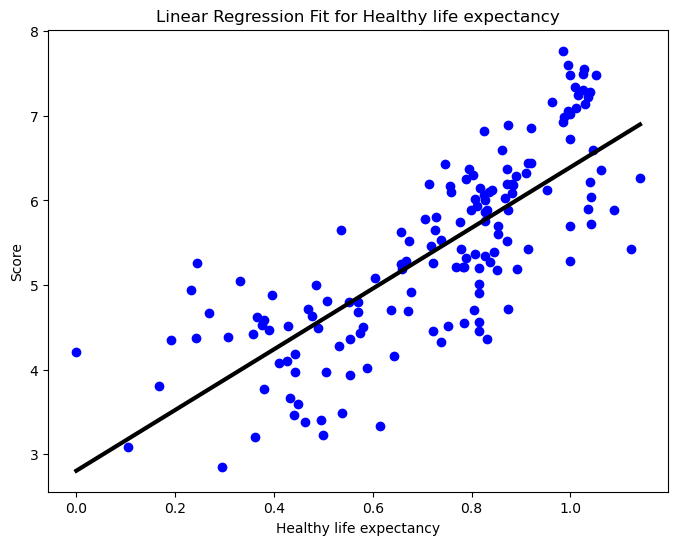

/Users/dilagurer/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


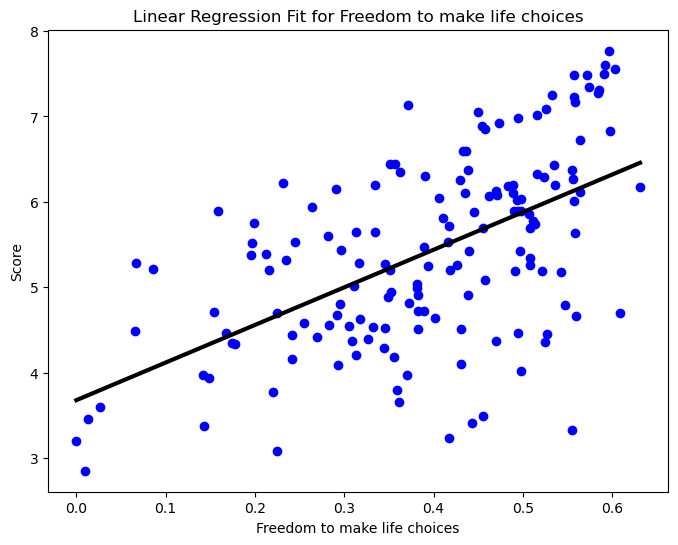

/Users/dilagurer/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


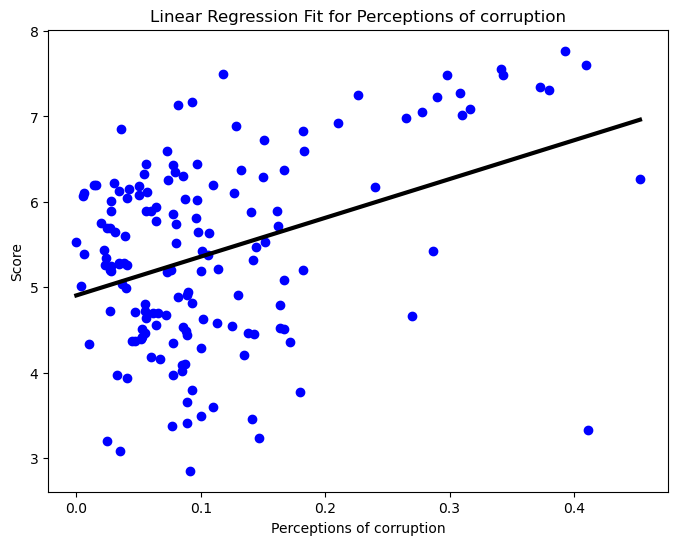

/Users/dilagurer/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


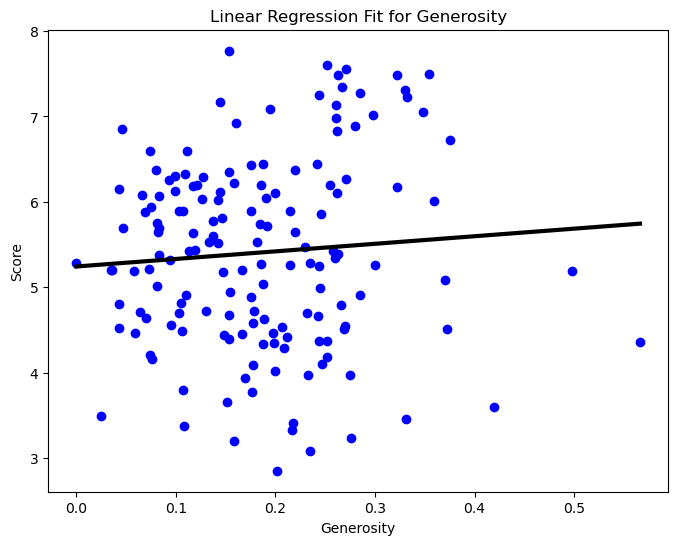

In [28]:
import numpy as np
import matplotlib.pyplot as plt


predictor_variables = ['GDP per capita', 'Social support', 'Healthy life expectancy',
                       'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']


for variable in predictor_variables:
   
    X_variable = df[[variable]]
    y = df['Score']
    
    
    reg = LinearRegression()
    reg.fit(X_variable, y)
    
   
    prediction_space = np.linspace(min(X_variable.values), max(X_variable.values)).reshape(-1, 1)
    
   
    y_pred = reg.predict(prediction_space)
    
   
    plt.figure(figsize=(8, 6))
    plt.scatter(X_variable, y, color='blue')
    plt.plot(prediction_space, y_pred, color='black', linewidth=3)
    plt.xlabel(variable)
    plt.ylabel('Score')
    plt.title(f'Linear Regression Fit for {variable}')
    plt.show()


In [47]:
from sklearn.metrics import mean_squared_error
import numpy as np


rmse = np.sqrt(mean_squared_error(y_pred, y_test))


print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 0.9878040384641533


In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


reg = LinearRegression()


cv_results = cross_val_score(reg, X, y, cv=5)


print("Cross-Validation Scores:", cv_results)


print("Mean Cross-Validation Score:", np.mean(cv_results))


Cross-Validation Scores: [-5.57285067 -5.9477523  -6.23988074 -8.84930385 -2.39521998]
Mean Cross-Validation Score: -5.801001509838042


In [93]:
from sklearn.linear_model import Lasso


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


lasso = Lasso(alpha=0.1)


lasso.fit(X_train, y_train)


lasso_pred = lasso.predict(X_test)


r2_score = lasso.score(X_test, y_test)


print("R^2 Score (Lasso):", r2_score)


R^2 Score (Lasso): 0.5196322838318946


In [35]:
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=0.1)


lasso_coef = lasso.fit(X, y).coef_


print("Lasso Coefficients:", lasso_coef)


Lasso Coefficients: [1.35429473 0.40532089 0.         0.         0.         0.        ]


In [37]:
def display_plot(cv_scores, cv_scores_std, alpha_space):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_ylim(0.25, 0.35)
    ax.set_xscale('log')
    plt.show()


In [41]:
from sklearn.linear_model import RidgeCV
import numpy as np


alphas = np.logspace(-4, 4, 100)


ridge_cv = RidgeCV(alphas=alphas, cv=5)


ridge_cv.fit(X_train, y_train)


best_alpha_ridge = ridge_cv.alpha_


print("Best alpha for Ridge:", best_alpha_ridge)


r2_score_ridge = ridge_cv.score(X_test, y_test)


print("R^2 Score (Ridge):", r2_score_ridge)


Best alpha for Ridge: 0.6280291441834259
R^2 Score (Ridge): 0.6673941235948362


In [42]:
from sklearn.linear_model import LassoCV


lasso_cv = LassoCV(cv=5)


lasso_cv.fit(X_train, y_train)


best_alpha_lasso = lasso_cv.alpha_


print("Best alpha for Lasso:", best_alpha_lasso)


r2_score_lasso = lasso_cv.score(X_test, y_test)


print("R^2 Score (Lasso):", r2_score_lasso)


Best alpha for Lasso: 0.005815372239742716
R^2 Score (Lasso): 0.6664963334361766


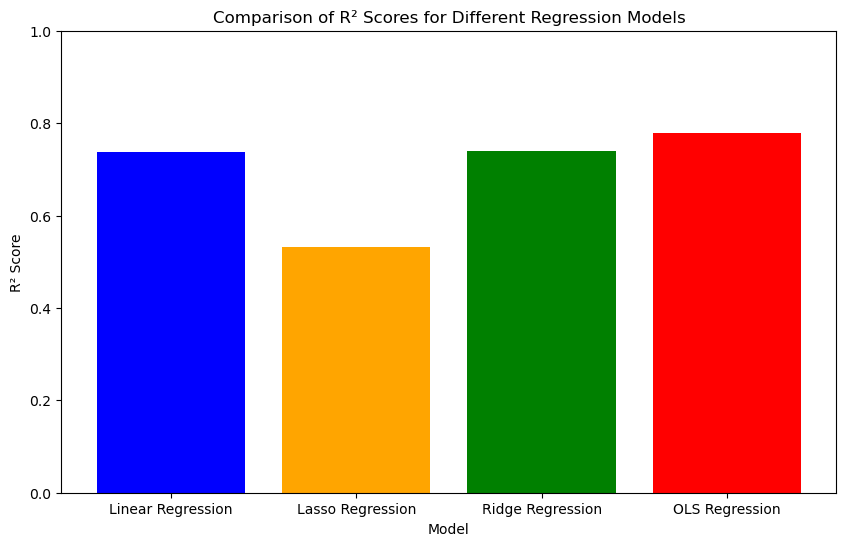

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, RidgeCV
from sklearn.metrics import r2_score
import statsmodels.api as sm


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)

alphas = np.logspace(-4, 4, 100)
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train, y_train)
y_pred_ridge = ridge_cv.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)

X_sm = sm.add_constant(X) 
ols_model = sm.OLS(y, X_sm).fit()
r2_ols = ols_model.rsquared


models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'OLS Regression']
r2_values = [r2_linear, r2_lasso, r2_ridge, r2_ols]

plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.title('Comparison of R² Scores for Different Regression Models')
plt.ylim(0, 1)
plt.show()


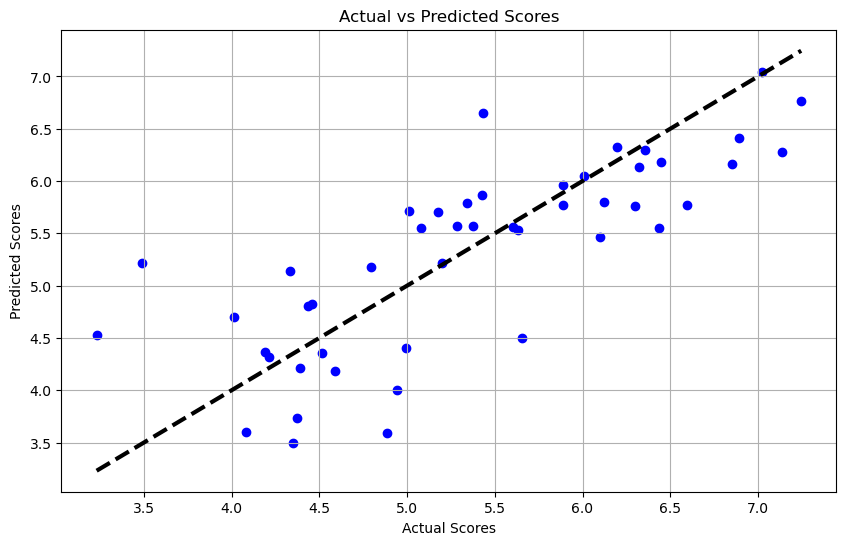

In [60]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



X = df[['GDP per capita', 'Social support', 'Healthy life expectancy',
        'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']]
y = df['Score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)  
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Actual vs Predicted Scores')
plt.grid(True)
plt.show()


In [95]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


X = df[['GDP per capita', 'Social support', 'Healthy life expectancy',
        'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']]
y = df['Score']

X_with_const = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X_with_const, y, test_size=0.3, random_state=21)

model = sm.OLS(y_train, X_train).fit()


print(model.summary())

p_values = model.pvalues
print("P-values for the predictors:")
print(p_values)


                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     64.52
Date:                Thu, 06 Jun 2024   Prob (F-statistic):           1.66e-32
Time:                        23:14:01   Log-Likelihood:                -77.666
No. Observations:                 109   AIC:                             169.3
Df Residuals:                     102   BIC:                             188.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

LOGISTIC REGRESSION

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge


param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],  
}


ridge = Ridge()


grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


best_model = grid_search.best_estimator_

mse = mean_squared_error(y_test, best_model.predict(X_test))
print("Mean Squared Error on Test Set:", mse)


Best Hyperparameters: {'alpha': 1}
Mean Squared Error on Test Set: 0.4135707990575507


In [106]:
from sklearn.model_selection import train_test_split


X = df[['GDP per capita', 'Social support', 'Healthy life expectancy',
        'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']]
y = df['BinaryScore']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)


In [107]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


df['BinaryScore'] = df['Score'].apply(lambda x: 1 if x > 6 else 0)


X = df[['GDP per capita', 'Social support', 'Healthy life expectancy',
        'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']]
y = df['BinaryScore']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)


logreg = LogisticRegression()


logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Accuracy: 0.8936170212765957
Confusion Matrix:
 [[32  0]
 [ 5 10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        32
           1       1.00      0.67      0.80        15

    accuracy                           0.89        47
   macro avg       0.93      0.83      0.86        47
weighted avg       0.91      0.89      0.89        47



In [104]:
from sklearn.model_selection import cross_val_score


logreg = LogisticRegression()

cv_scores = cross_val_score(logreg, X, y, cv=5)


print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))


Cross-Validation Scores: [0.6875     0.96774194 0.87096774 0.87096774 0.74193548]
Mean Cross-Validation Score: 0.8278225806451613


Accuracy: 0.8936170212765957
Confusion Matrix:
 [[32  0]
 [ 5 10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        32
           1       1.00      0.67      0.80        15

    accuracy                           0.89        47
   macro avg       0.93      0.83      0.86        47
weighted avg       0.91      0.89      0.89        47

Mean Squared Error (MSE): 0.10638297872340426
Root Mean Squared Error (RMSE): 0.3261640365267211
Pseudo R² Score: 0.5115876602606143


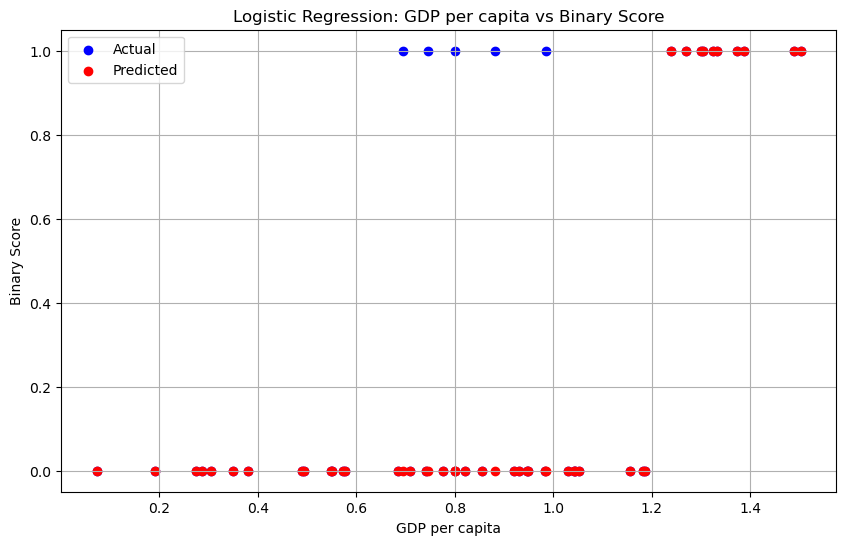

Best alpha for Lasso: 0.0011719128787983544
R² Score (Lasso): 0.736525633365397
Lasso Coefficients: [0.81439535 1.12510832 0.87355336 1.56221474 0.26251802 0.84287722]
Best alpha for Ridge: {'alpha': 0.1}
R² Score (Ridge): 0.7386395153144539


In [105]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, LassoCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score
import matplotlib.pyplot as plt




df['BinaryScore'] = df['Score'].apply(lambda x: 1 if x > 6 else 0)


X = df[['GDP per capita', 'Social support', 'Healthy life expectancy',
        'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']]
y = df['BinaryScore']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)


logreg = LogisticRegression()


logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

y_prob = logreg.predict_proba(X_test)[:, 1]
pseudo_r2 = r2_score(y_test, y_prob)
print("Pseudo R² Score:", pseudo_r2)


plt.figure(figsize=(10, 6))
plt.scatter(X_test.iloc[:, 0], y_test, color='blue', label='Actual')
plt.scatter(X_test.iloc[:, 0], y_pred, color='red', label='Predicted')
plt.xlabel('GDP per capita')
plt.ylabel('Binary Score')
plt.title('Logistic Regression: GDP per capita vs Binary Score')
plt.legend()
plt.grid(True)
plt.show()

y_reg = df['Score']


X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.3, random_state=21)


lasso_cv = LassoCV(cv=5)


lasso_cv.fit(X_train_reg, y_train_reg)


best_alpha_lasso = lasso_cv.alpha_
print("Best alpha for Lasso:", best_alpha_lasso)


r2_score_lasso = lasso_cv.score(X_test_reg, y_test_reg)
print("R² Score (Lasso):", r2_score_lasso)


lasso_coefficients = lasso_cv.coef_
print("Lasso Coefficients:", lasso_coefficients)


ridge = Ridge()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')


grid_search_ridge.fit(X_train_reg, y_train_reg)


best_params_ridge = grid_search_ridge.best_params_
print("Best alpha for Ridge:", best_params_ridge)


best_ridge_model = grid_search_ridge.best_estimator_

r2_score_ridge = best_ridge_model.score(X_test_reg, y_test_reg)
print("R² Score (Ridge):", r2_score_ridge)


In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
import matplotlib.pyplot as plt



df['BinaryScore'] = df['Score'].apply(lambda x: 1 if x > 6 else 0)


X = df[['GDP per capita', 'Social support', 'Healthy life expectancy',
        'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']]
y = df['BinaryScore']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)


ridge_logreg = LogisticRegression(penalty='l2', solver='liblinear')
ridge_logreg.fit(X_train, y_train)
y_pred_ridge = ridge_logreg.predict(X_test)
accuracy_ridge = accuracy_score(y_test, y_pred_ridge)
print("Ridge Logistic Regression Accuracy:", accuracy_ridge)
conf_matrix_ridge = confusion_matrix(y_test, y_pred_ridge)
class_report_ridge = classification_report(y_test, y_pred_ridge)
print("Ridge Logistic Regression Confusion Matrix:\n", conf_matrix_ridge)
print("\nRidge Logistic Regression Classification Report:\n", class_report_ridge)


lasso_logreg = LogisticRegression(penalty='l1', solver='liblinear')
lasso_logreg.fit(X_train, y_train)
y_pred_lasso = lasso_logreg.predict(X_test)
accuracy_lasso = accuracy_score(y_test, y_pred_lasso)
print("Lasso Logistic Regression Accuracy:", accuracy_lasso)
conf_matrix_lasso = confusion_matrix(y_test, y_pred_lasso)
class_report_lasso = classification_report(y_test, y_pred_lasso)
print("Lasso Logistic Regression Confusion Matrix:\n", conf_matrix_lasso)
print("\nLasso Logistic Regression Classification Report:\n", class_report_lasso)


param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search_lasso = GridSearchCV(LogisticRegression(penalty='l1', solver='liblinear'), param_grid, cv=5, scoring='accuracy')
grid_search_lasso.fit(X_train, y_train)
best_params_lasso = grid_search_lasso.best_params_
print("Best C for Lasso Logistic Regression:", best_params_lasso)
best_lasso_model = grid_search_lasso.best_estimator_


grid_search_ridge = GridSearchCV(LogisticRegression(penalty='l2', solver='liblinear'), param_grid, cv=5, scoring='accuracy')
grid_search_ridge.fit(X_train, y_train)
best_params_ridge = grid_search_ridge.best_params_
print("Best C for Ridge Logistic Regression:", best_params_ridge)
best_ridge_model = grid_search_ridge.best_estimator_


y_pred_best_lasso = best_lasso_model.predict(X_test)
accuracy_best_lasso = accuracy_score(y_test, y_pred_best_lasso)
print("Best Lasso Logistic Regression Accuracy:", accuracy_best_lasso)

y_pred_best_ridge = best_ridge_model.predict(X_test)
accuracy_best_ridge = accuracy_score(y_test, y_pred_best_ridge)
print("Best Ridge Logistic Regression Accuracy:", accuracy_best_ridge)


mse_best_lasso = mean_squared_error(y_test, y_pred_best_lasso)
rmse_best_lasso = np.sqrt(mse_best_lasso)
print("Best Lasso Logistic Regression MSE:", mse_best_lasso)
print("Best Lasso Logistic Regression RMSE:", rmse_best_lasso)

mse_best_ridge = mean_squared_error(y_test, y_pred_best_ridge)
rmse_best_ridge = np.sqrt(mse_best_ridge)
print("Best Ridge Logistic Regression MSE:", mse_best_ridge)
print("Best Ridge Logistic Regression RMSE:", rmse_best_ridge)


Ridge Logistic Regression Accuracy: 0.8723404255319149
Ridge Logistic Regression Confusion Matrix:
 [[32  0]
 [ 6  9]]

Ridge Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91        32
           1       1.00      0.60      0.75        15

    accuracy                           0.87        47
   macro avg       0.92      0.80      0.83        47
weighted avg       0.89      0.87      0.86        47

Lasso Logistic Regression Accuracy: 0.8936170212765957
Lasso Logistic Regression Confusion Matrix:
 [[32  0]
 [ 5 10]]

Lasso Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        32
           1       1.00      0.67      0.80        15

    accuracy                           0.89        47
   macro avg       0.93      0.83      0.86        47
weighted avg       0.91      0.89      0.89        47

Best C

In [164]:

logreg_coefficients = logreg.coef_[0]
logreg_intercept = logreg.intercept_[0]
print("Logistic Regression Intercept:", logreg_intercept)
print("Logistic Regression Coefficients:")
for predictor, coef in zip(X.columns, logreg_coefficients):
    print(f"{predictor}: {coef}")


print("Lasso Coefficients:")
for predictor, coef in zip(X.columns, lasso_coefficients):
    print(f"{predictor}: {coef}")


ridge_coefficients = best_ridge_model.coef_
print("Ridge Coefficients:")
for predictor, coef in zip(X.columns, ridge_coefficients):
    print(f"{predictor}: {coef}")




Logistic Regression Intercept: -7.054138917215498
Logistic Regression Coefficients:
Is_Europe: 2.394694168141302
GDP per capita: 1.6267428370389814
Social support: 1.480992204134107
Healthy life expectancy: 1.396284986920191
Freedom to make life choices: 0.25172957535536006
Perceptions of corruption: 0.36306356224808306
Lasso Coefficients:
Is_Europe: 0.8143953476624779
GDP per capita: 1.1251083192593825
Social support: 0.8735533594961641
Healthy life expectancy: 1.5622147427709918
Freedom to make life choices: 0.26251801680768827
Perceptions of corruption: 0.842877219980052
Ridge Coefficients:
Is_Europe: [ 4.07352043  3.54354325  3.55219601  8.3233172  -4.35478489  1.76819067]


Lasso Logistic Regression - Training Accuracy: 0.8532110091743119
Lasso Logistic Regression - Testing Accuracy: 0.8936170212765957
Ridge Logistic Regression - Training Accuracy: 0.8165137614678899
Ridge Logistic Regression - Testing Accuracy: 0.8723404255319149


<Figure size 1000x600 with 0 Axes>

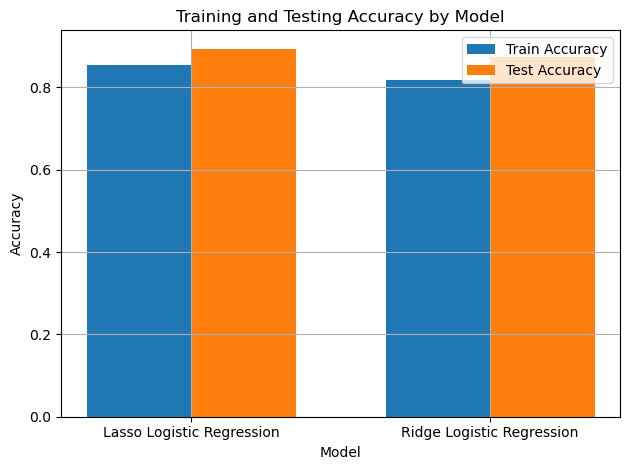

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


df['BinaryScore'] = df['Score'].apply(lambda x: 1 if x > 6 else 0)


X_class = df[['GDP per capita', 'Social support', 'Healthy life expectancy',
        'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']]
y_class = df['BinaryScore']


X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.3, random_state=21)


lasso_logreg = LogisticRegression(penalty='l1', solver='liblinear')
lasso_logreg.fit(X_train_class, y_train_class)
lasso_train_acc = accuracy_score(y_train_class, lasso_logreg.predict(X_train_class))
lasso_test_acc = accuracy_score(y_test_class, lasso_logreg.predict(X_test_class))


ridge_logreg = LogisticRegression(penalty='l2', solver='liblinear')
ridge_logreg.fit(X_train_class, y_train_class)
ridge_train_acc = accuracy_score(y_train_class, ridge_logreg.predict(X_train_class))
ridge_test_acc = accuracy_score(y_test_class, ridge_logreg.predict(X_test_class))


print("Lasso Logistic Regression - Training Accuracy:", lasso_train_acc)
print("Lasso Logistic Regression - Testing Accuracy:", lasso_test_acc)
print("Ridge Logistic Regression - Training Accuracy:", ridge_train_acc)
print("Ridge Logistic Regression - Testing Accuracy:", ridge_test_acc)


plt.figure(figsize=(10, 6))
labels = ['Lasso Logistic Regression', 'Ridge Logistic Regression']
train_accuracies = [lasso_train_acc, ridge_train_acc]
test_accuracies = [lasso_test_acc, ridge_test_acc]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_accuracies, width, label='Train Accuracy')
rects2 = ax.bar(x + width/2, test_accuracies, width, label='Test Accuracy')

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Training and Testing Accuracy by Model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.grid(True)
plt.show()


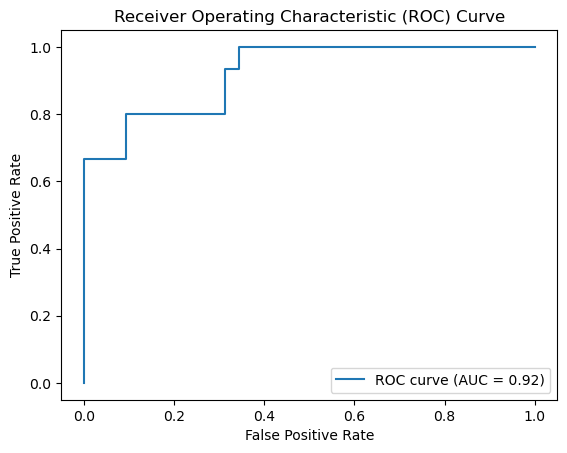

In [54]:
from sklearn.metrics import roc_curve, auc


logreg.fit(X_train, y_train)

y_pred_prob = logreg.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)


auc_score = auc(fpr, tpr)


plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


/Users/dilagurer/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


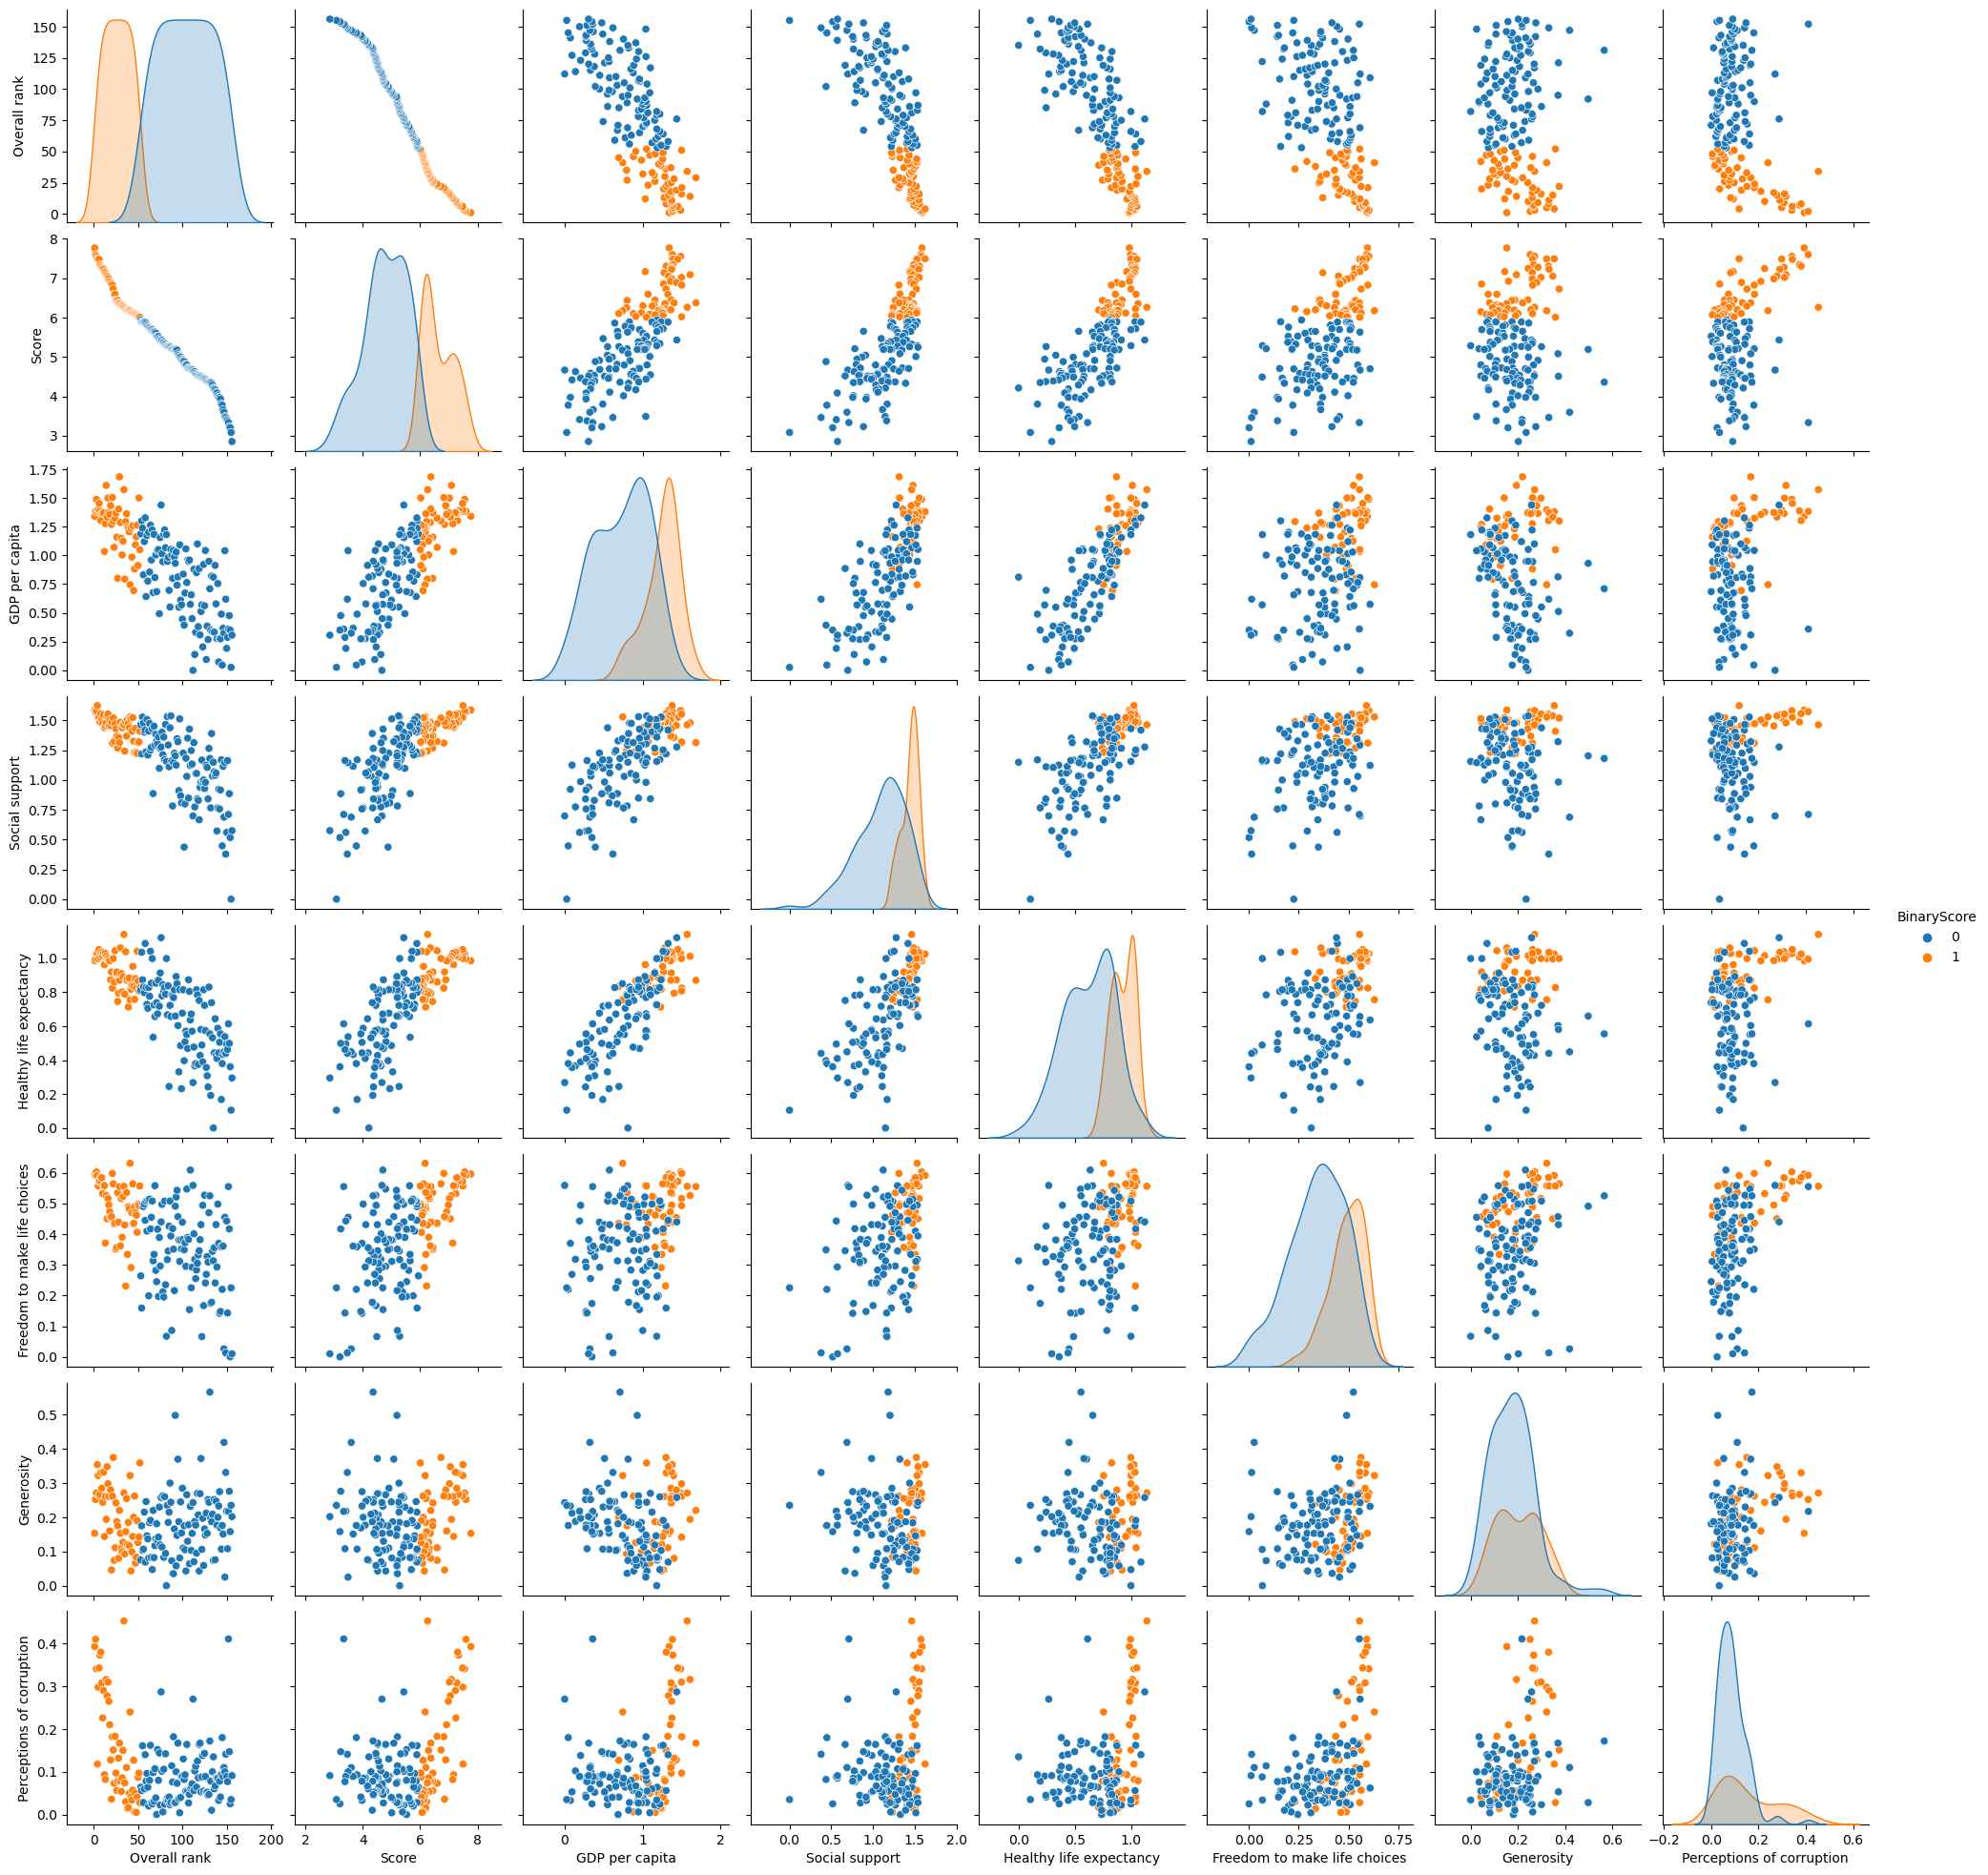

In [50]:
import seaborn as sns


sns.pairplot(df, hue='BinaryScore')
plt.show()


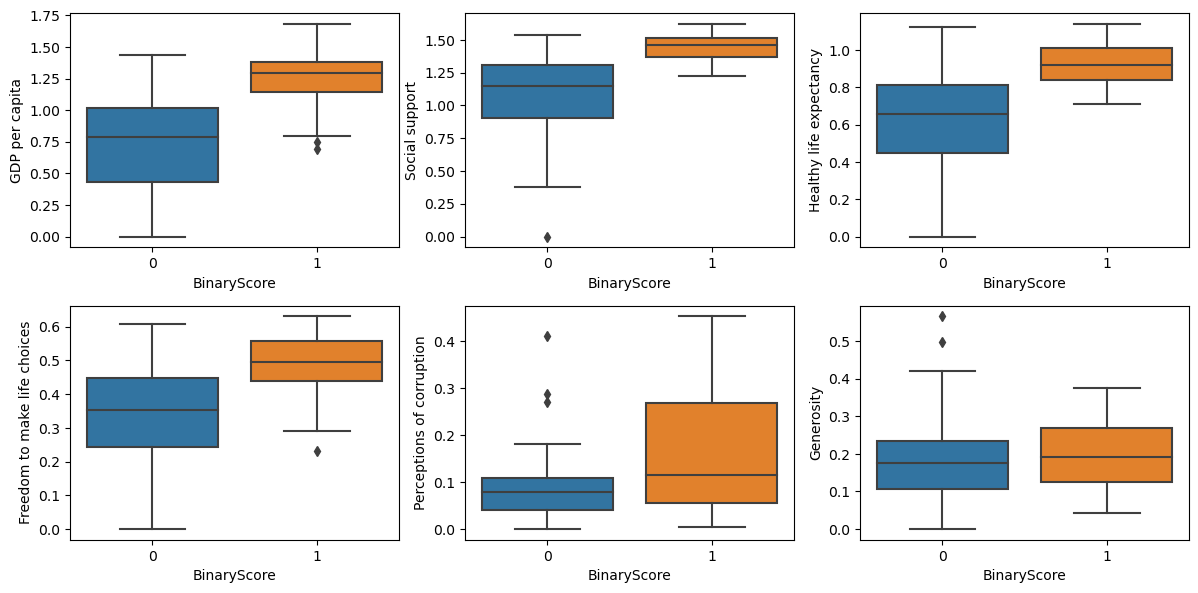

In [51]:

plt.figure(figsize=(12, 6))
for i, col in enumerate(X.columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='BinaryScore', y=col, data=df)
plt.tight_layout()
plt.show()


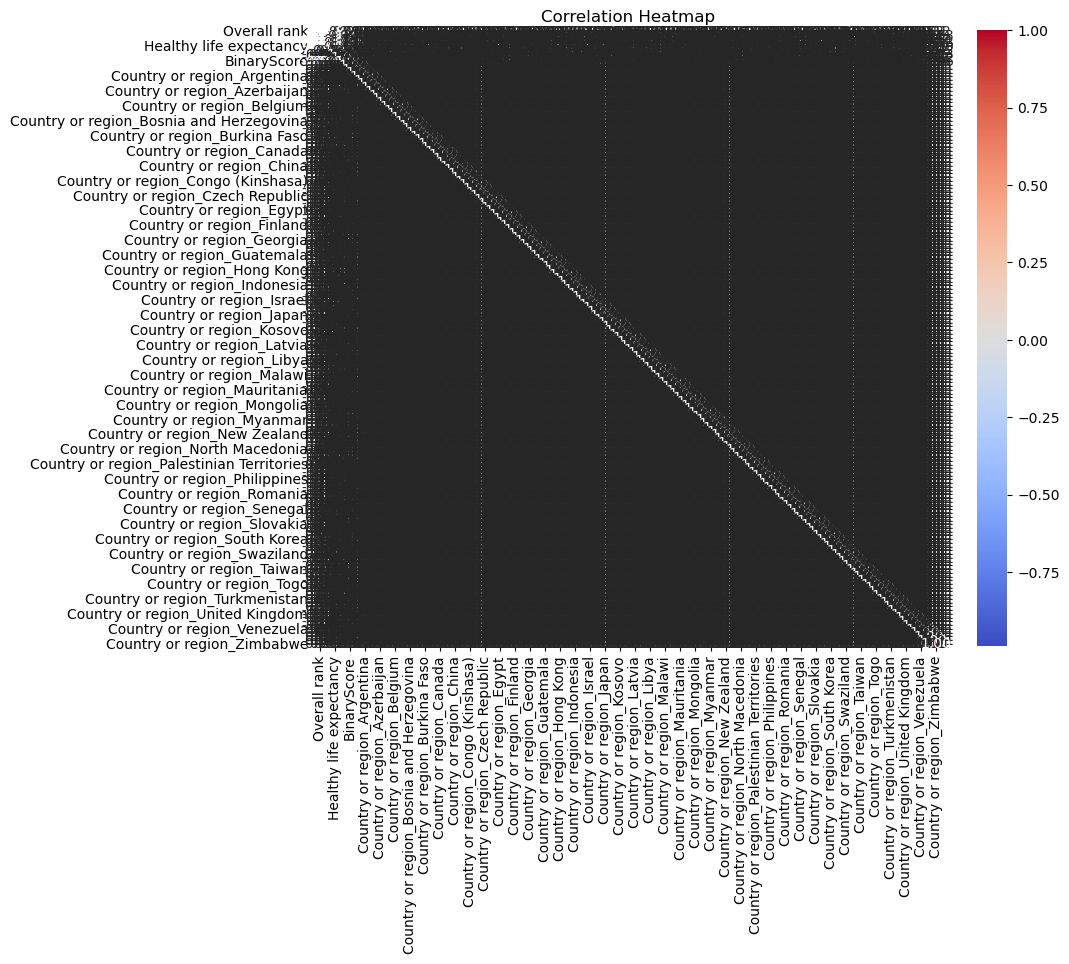

In [53]:

df_encoded = pd.get_dummies(df)


corr = df_encoded.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


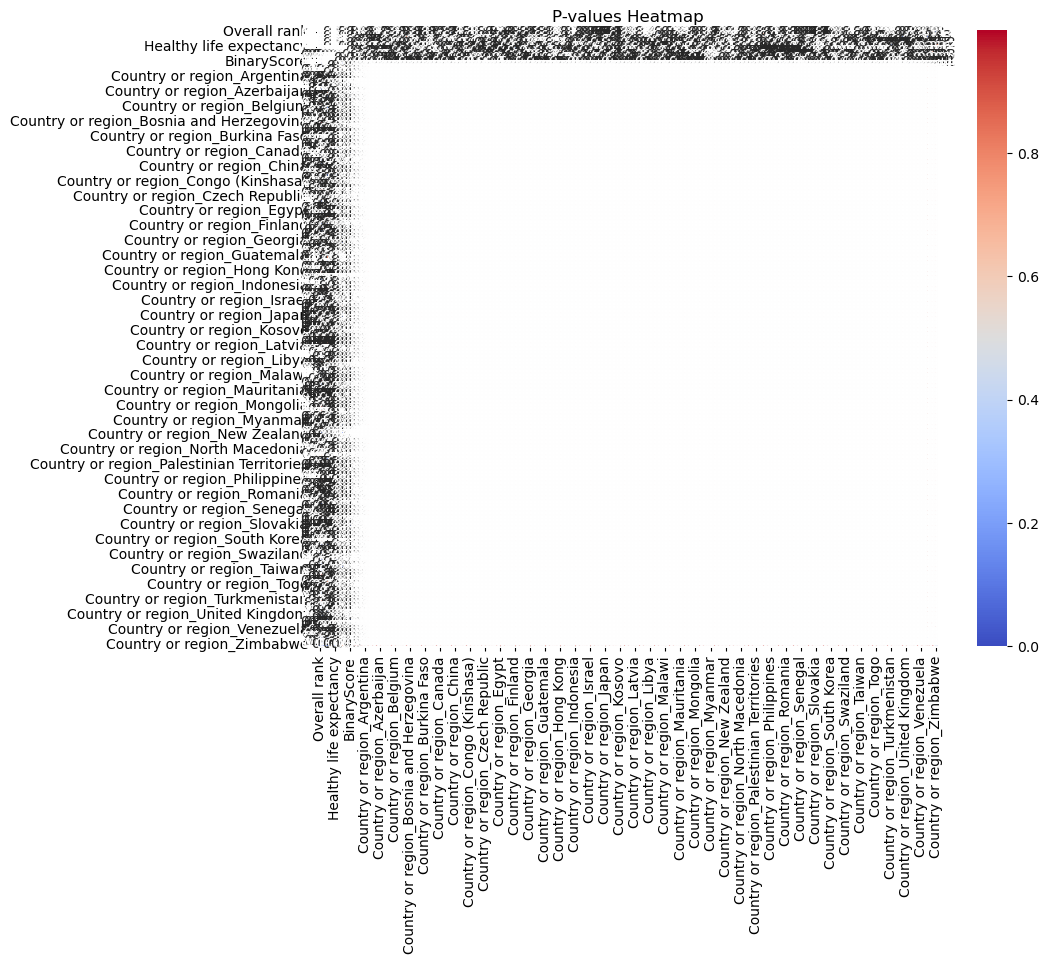

In [54]:
from scipy.stats import pearsonr


def calculate_corr_with_pvalues(df):
    cols = df.columns
    p_values = {col: {} for col in cols}
    correlations = df.corr()
    for col1 in cols:
        for col2 in cols:
            corr, p_value = pearsonr(df[col1], df[col2])
            p_values[col1][col2] = p_value
    return correlations, p_values


correlations, p_values = calculate_corr_with_pvalues(df_encoded)


plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(p_values), annot=True, cmap='coolwarm', fmt=".3f")
plt.title('P-values Heatmap')
plt.show()


In [108]:
import statsmodels.api as sm


X_with_const = sm.add_constant(X)

log_model = sm.Logit(y, X_with_const).fit()


print(log_model.summary())


Optimization terminated successfully.
         Current function value: 0.257440
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:            BinaryScore   No. Observations:                  156
Model:                          Logit   Df Residuals:                      149
Method:                           MLE   Df Model:                            6
Date:                Fri, 07 Jun 2024   Pseudo R-squ.:                  0.5955
Time:                        00:51:15   Log-Likelihood:                -40.161
converged:                       True   LL-Null:                       -99.296
Covariance Type:            nonrobust   LLR p-value:                 3.759e-23
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -21.8282      4.639     -4.705      0.000

Optimization terminated successfully.
         Current function value: 0.258226
         Iterations 9


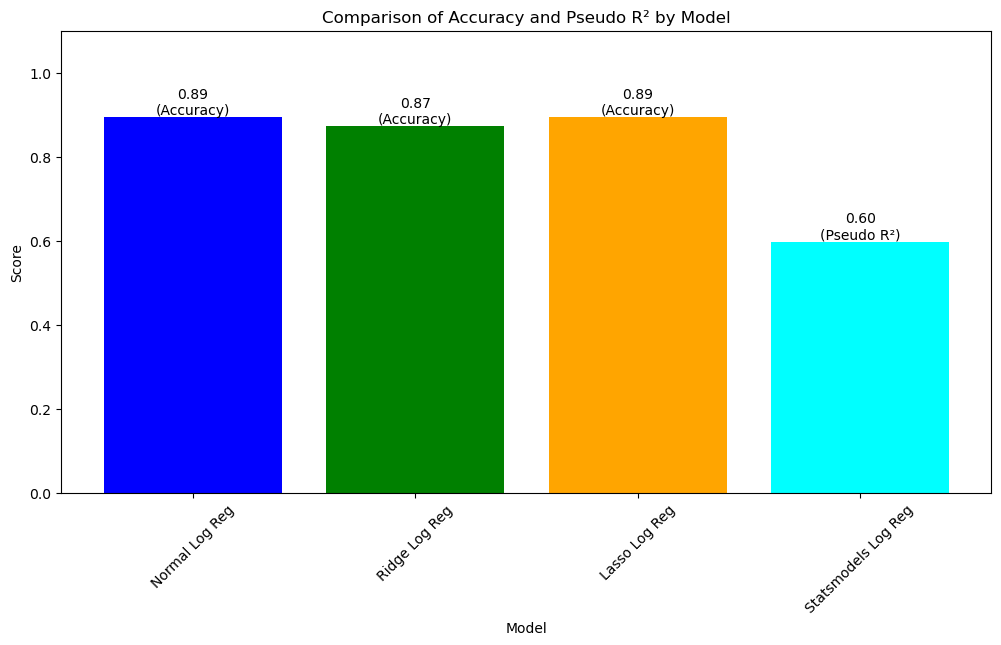

Pseudo R² for Statsmodels Logistic Regression: 0.5969440646201202
                           Logit Regression Results                           
Dep. Variable:            BinaryScore   No. Observations:                  109
Model:                          Logit   Df Residuals:                      102
Method:                           MLE   Df Model:                            6
Date:                Fri, 07 Jun 2024   Pseudo R-squ.:                  0.5969
Time:                        00:57:34   Log-Likelihood:                -28.147
converged:                       True   LL-Null:                       -69.833
Covariance Type:            nonrobust   LLR p-value:                 7.172e-16
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -21.4017      5.691     -3.761      0.000     -32.555     -10.248
GDP per cap

In [111]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import statsmodels.api as sm



df['BinaryScore'] = df['Score'].apply(lambda x: 1 if x > 6 else 0)


X = df[['GDP per capita', 'Social support', 'Healthy life expectancy',
        'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']]
y = df['BinaryScore']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)


logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)


ridge_logreg = LogisticRegression(penalty='l2', solver='liblinear')
ridge_logreg.fit(X_train, y_train)
y_pred_ridge = ridge_logreg.predict(X_test)
accuracy_ridge = accuracy_score(y_test, y_pred_ridge)


lasso_logreg = LogisticRegression(penalty='l1', solver='liblinear')
lasso_logreg.fit(X_train, y_train)
y_pred_lasso = lasso_logreg.predict(X_test)
accuracy_lasso = accuracy_score(y_test, y_pred_lasso)

X_with_const = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_with_const).fit()


log_likelihood = logit_model.llf
ll_null = logit_model.llnull
pseudo_r2 = 1 - (log_likelihood / ll_null)


models = ['Normal Log Reg', 'Ridge Log Reg', 'Lasso Log Reg', 'Statsmodels Log Reg']
values = [accuracy_logreg, accuracy_ridge, accuracy_lasso, pseudo_r2]
metrics = ['Accuracy', 'Accuracy', 'Accuracy', 'Pseudo R²']


fig, ax1 = plt.subplots(figsize=(12, 6))

bars = ax1.bar(models, values, color=['blue', 'green', 'orange', 'cyan'])
for bar, metric in zip(bars, metrics):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2.0, height,
             f'{height:.2f}\n({metric})',
             ha='center', va='bottom', fontsize=10)

plt.title('Comparison of Accuracy and Pseudo R² by Model')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.xticks(rotation=45)
plt.show()


print("Pseudo R² for Statsmodels Logistic Regression:", pseudo_r2)


print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.258226
         Iterations 9


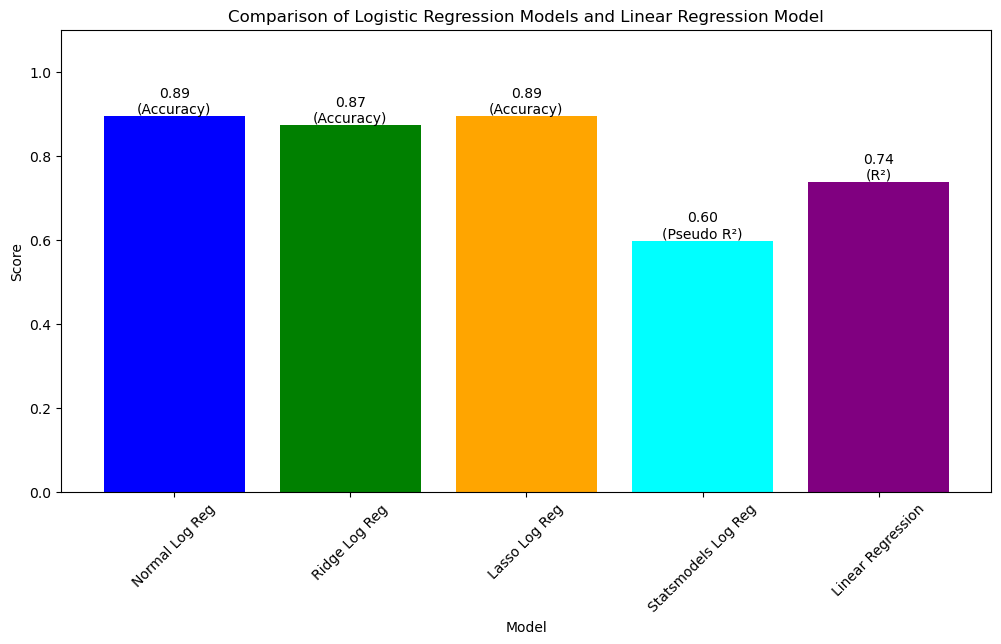

Pseudo R² for Statsmodels Logistic Regression: 0.5969440646201202
                           Logit Regression Results                           
Dep. Variable:            BinaryScore   No. Observations:                  109
Model:                          Logit   Df Residuals:                      102
Method:                           MLE   Df Model:                            6
Date:                Fri, 07 Jun 2024   Pseudo R-squ.:                  0.5969
Time:                        01:05:08   Log-Likelihood:                -28.147
converged:                       True   LL-Null:                       -69.833
Covariance Type:            nonrobust   LLR p-value:                 7.172e-16
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -21.4017      5.691     -3.761      0.000     -32.555     -10.248
GDP per cap

In [112]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm




df['BinaryScore'] = df['Score'].apply(lambda x: 1 if x > 6 else 0)


X = df[['GDP per capita', 'Social support', 'Healthy life expectancy',
        'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']]
y = df['BinaryScore']
y_reg = df['Score']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)


X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.3, random_state=21)


logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)


ridge_logreg = LogisticRegression(penalty='l2', solver='liblinear')
ridge_logreg.fit(X_train, y_train)
y_pred_ridge = ridge_logreg.predict(X_test)
accuracy_ridge = accuracy_score(y_test, y_pred_ridge)


lasso_logreg = LogisticRegression(penalty='l1', solver='liblinear')
lasso_logreg.fit(X_train, y_train)
y_pred_lasso = lasso_logreg.predict(X_test)
accuracy_lasso = accuracy_score(y_test, y_pred_lasso)


X_with_const = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_with_const).fit()

log_likelihood = logit_model.llf
ll_null = logit_model.llnull
pseudo_r2 = 1 - (log_likelihood / ll_null)


linear_model = LinearRegression()
linear_model.fit(X_train_reg, y_train_reg)
y_pred_linear = linear_model.predict(X_test_reg)
r2_linear = r2_score(y_test_reg, y_pred_linear)


models = ['Normal Log Reg', 'Ridge Log Reg', 'Lasso Log Reg', 'Statsmodels Log Reg', 'Linear Regression']
values = [accuracy_logreg, accuracy_ridge, accuracy_lasso, pseudo_r2, r2_linear]
metrics = ['Accuracy', 'Accuracy', 'Accuracy', 'Pseudo R²', 'R²']


fig, ax1 = plt.subplots(figsize=(12, 6))

bars = ax1.bar(models, values, color=['blue', 'green', 'orange', 'cyan', 'purple'])
for bar, metric in zip(bars, metrics):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2.0, height,
             f'{height:.2f}\n({metric})',
             ha='center', va='bottom', fontsize=10)

plt.title('Comparison of Logistic Regression Models and Linear Regression Model')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.xticks(rotation=45)
plt.show()


print("Pseudo R² for Statsmodels Logistic Regression:", pseudo_r2)


print(logit_model.summary())


continent: europe

In [68]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression


file_path = '/Users/dilagurer/Desktop/2019.csv'
df = pd.read_csv(file_path, delimiter=';')


country_to_continent = {
    'Finland': 'Europe',
    'Denmark': 'Europe',
    'Norway': 'Europe',
    'Iceland': 'Europe',
    'Netherlands': 'Europe',
    'Switzerland': 'Europe',
    'Sweden': 'Europe',
    'New Zealand': 'Oceania',
    'Canada': 'North America',
    'Austria': 'Europe',
    'Australia': 'Oceania',
    'Costa Rica': 'North America',
    'Israel': 'Asia',
    'Luxembourg': 'Europe',
    'United Kingdom': 'Europe',
    'Ireland': 'Europe',
    'Germany': 'Europe',
    'Belgium': 'Europe',
    'United States': 'North America',
    'Czech Republic': 'Europe',
    'United Arab Emirates': 'Asia',
    'Malta': 'Europe',
    'Mexico': 'North America',
    'France': 'Europe',
    'Taiwan': 'Asia',
    'Chile': 'South America',
    'Guatemala': 'North America',
    'Saudi Arabia': 'Asia',
    'Qatar': 'Asia',
    'Spain': 'Europe',
    'Panama': 'North America',
    'Brazil': 'South America',
    'Uruguay': 'South America',
    'Singapore': 'Asia',
    'El Salvador': 'North America',
    'Italy': 'Europe',
    'Bahrain': 'Asia',
    'Slovakia': 'Europe',
    'Trinidad & Tobago': 'North America',
    'Poland': 'Europe',
    'Uzbekistan': 'Asia',
    'Lithuania': 'Europe',
    'Colombia': 'South America',
    'Slovenia': 'Europe',
    'Nicaragua': 'North America',
    'Kosovo': 'Europe',
    'Argentina': 'South America',
    'Romania': 'Europe',
    'Cyprus': 'Europe',
    'Ecuador': 'South America',
    'Kuwait': 'Asia',
    'Thailand': 'Asia',
    'Latvia': 'Europe',
    'South Korea': 'Asia',
    'Estonia': 'Europe',
    'Jamaica': 'North America',
    'Mauritius': 'Africa',
    'Japan': 'Asia',
    'Honduras': 'North America',
    'Kazakhstan': 'Asia',
    'Bolivia': 'South America',
    'Hungary': 'Europe',
    'Paraguay': 'South America',
    'Northern Cyprus': 'Europe',
    'Peru': 'South America',
    'Portugal': 'Europe',
    'Pakistan': 'Asia',
    'Russia': 'Europe',
    'Philippines': 'Asia',
    'Serbia': 'Europe',
    'Moldova': 'Europe',
    'Libya': 'Africa',
    'Montenegro': 'Europe',
    'Tajikistan': 'Asia',
    'Croatia': 'Europe',
    'Hong Kong': 'Asia',
    'Dominican Republic': 'North America',
    'Bosnia and Herzegovina': 'Europe',
    'Turkey': 'Asia',
    'Malaysia': 'Asia',
    'Belarus': 'Europe',
    'Greece': 'Europe',
    'Mongolia': 'Asia',
    'North Macedonia': 'Europe',
    'Nigeria': 'Africa',
    'Kyrgyzstan': 'Asia',
    'Turkmenistan': 'Asia',
    'Algeria': 'Africa',
    'Morocco': 'Africa',
    'Azerbaijan': 'Asia',
    'Lebanon': 'Asia',
    'Indonesia': 'Asia',
    'China': 'Asia',
    'Vietnam': 'Asia',
    'Bhutan': 'Asia',
    'Cameroon': 'Africa',
    'Bulgaria': 'Europe',
    'Ghana': 'Africa',
    'Ivory Coast': 'Africa',
    'Nepal': 'Asia',
    'Jordan': 'Asia',
    'Benin': 'Africa',
    'Congo (Brazzaville)': 'Africa',
    'Gabon': 'Africa',
    'Laos': 'Asia',
    'South Africa': 'Africa',
    'Albania': 'Europe',
    'Venezuela': 'South America',
    'Cambodia': 'Asia',
    'Palestinian Territories': 'Asia',
    'Senegal': 'Africa',
    'Somalia': 'Africa',
    'Namibia': 'Africa',
    'Niger': 'Africa',
    'Burkina Faso': 'Africa',
    'Armenia': 'Asia',
    'Iran': 'Asia',
    'Guinea': 'Africa',
    'Georgia': 'Asia',
    'Gambia': 'Africa',
    'Kenya': 'Africa',
    'Mauritania': 'Africa',
    'Mozambique': 'Africa',
    'Tunisia': 'Africa',
    'Bangladesh': 'Asia',
    'Iraq': 'Asia',
    'Congo (Kinshasa)': 'Africa',
    'Mali': 'Africa',
    'Sierra Leone': 'Africa',
    'Sri Lanka': 'Asia',
    'Myanmar': 'Asia',
    'Chad': 'Africa',
    'Ukraine': 'Europe',
    'Ethiopia': 'Africa',
    'Swaziland': 'Africa',
    'Uganda': 'Africa',
    'Egypt': 'Africa',
    'Zambia': 'Africa',
    'Togo': 'Africa',
    'India': 'Asia',
    'Liberia': 'Africa',
    'Comoros': 'Africa',
    'Madagascar': 'Africa',
    'Lesotho': 'Africa',
    'Burundi': 'Africa',
    'Zimbabwe': 'Africa',
    'Haiti': 'North America',
    'Botswana': 'Africa',
    'Syria': 'Asia',
    'Malawi': 'Africa',
    'Yemen': 'Asia',
    'Rwanda': 'Africa',
    'Tanzania': 'Africa',
    'Afghanistan': 'Asia',
    'Central African Republic': 'Africa',
    'South Sudan': 'Africa'
}


df['Continent'] = df['Country or region'].map(country_to_continent)


df['Is_Europe'] = df['Continent'].apply(lambda x: 1 if x == 'Europe' else 0)


cols_with_missing_values = ['GDP per capita', 'Social support', 'Healthy life expectancy',
                            'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']




  Country or region Continent  Is_Europe
0           Finland    Europe          1
1           Denmark    Europe          1
2            Norway    Europe          1
3           Iceland    Europe          1
4       Netherlands    Europe          1
Training set size: 124
Testing set size: 32
Mean Squared Error (MSE): 1.3162814595959718
Root Mean Squared Error (RMSE): 1.1472931009972873
R² Score: 0.17215126960468774


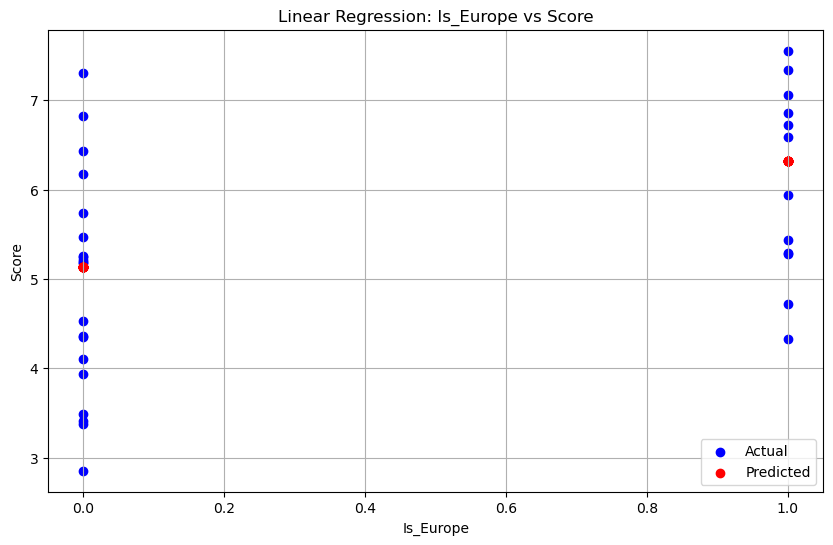

Coefficient of Is_Europe: 1.1895829787234042


In [149]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


file_path = '/Users/dilagurer/Desktop/2019.csv'
df = pd.read_csv(file_path, delimiter=';')

country_to_continent = {
    'Finland': 'Europe', 'Denmark': 'Europe', 'Norway': 'Europe', 'Iceland': 'Europe', 'Netherlands': 'Europe',
    'Switzerland': 'Europe', 'Sweden': 'Europe', 'New Zealand': 'Oceania', 'Canada': 'North America', 'Austria': 'Europe',
    'Australia': 'Oceania', 'Costa Rica': 'North America', 'Israel': 'Asia', 'Luxembourg': 'Europe', 'United Kingdom': 'Europe',
    'Ireland': 'Europe', 'Germany': 'Europe', 'Belgium': 'Europe', 'United States': 'North America', 'Czech Republic': 'Europe',
    'United Arab Emirates': 'Asia', 'Malta': 'Europe', 'Mexico': 'North America', 'France': 'Europe', 'Taiwan': 'Asia',
    'Chile': 'South America', 'Guatemala': 'North America', 'Saudi Arabia': 'Asia', 'Qatar': 'Asia', 'Spain': 'Europe',
    'Panama': 'North America', 'Brazil': 'South America', 'Uruguay': 'South America', 'Singapore': 'Asia', 'El Salvador': 'North America',
    'Italy': 'Europe', 'Bahrain': 'Asia', 'Slovakia': 'Europe', 'Trinidad & Tobago': 'North America', 'Poland': 'Europe',
    'Uzbekistan': 'Asia', 'Lithuania': 'Europe', 'Colombia': 'South America', 'Slovenia': 'Europe', 'Nicaragua': 'North America',
    'Kosovo': 'Europe', 'Argentina': 'South America', 'Romania': 'Europe', 'Cyprus': 'Europe', 'Ecuador': 'South America',
    'Kuwait': 'Asia', 'Thailand': 'Asia', 'Latvia': 'Europe', 'South Korea': 'Asia', 'Estonia': 'Europe', 'Jamaica': 'North America',
    'Mauritius': 'Africa', 'Japan': 'Asia', 'Honduras': 'North America', 'Kazakhstan': 'Asia', 'Bolivia': 'South America',
    'Hungary': 'Europe', 'Paraguay': 'South America', 'Northern Cyprus': 'Europe', 'Peru': 'South America', 'Portugal': 'Europe',
    'Pakistan': 'Asia', 'Russia': 'Europe', 'Philippines': 'Asia', 'Serbia': 'Europe', 'Moldova': 'Europe', 'Libya': 'Africa',
    'Montenegro': 'Europe', 'Tajikistan': 'Asia', 'Croatia': 'Europe', 'Hong Kong': 'Asia', 'Dominican Republic': 'North America',
    'Bosnia and Herzegovina': 'Europe', 'Turkey': 'Asia', 'Malaysia': 'Asia', 'Belarus': 'Europe', 'Greece': 'Europe',
    'Mongolia': 'Asia', 'North Macedonia': 'Europe', 'Nigeria': 'Africa', 'Kyrgyzstan': 'Asia', 'Turkmenistan': 'Asia',
    'Algeria': 'Africa', 'Morocco': 'Africa', 'Azerbaijan': 'Asia', 'Lebanon': 'Asia', 'Indonesia': 'Asia', 'China': 'Asia',
    'Vietnam': 'Asia', 'Bhutan': 'Asia', 'Cameroon': 'Africa', 'Bulgaria': 'Europe', 'Ghana': 'Africa', 'Ivory Coast': 'Africa',
    'Nepal': 'Asia', 'Jordan': 'Asia', 'Benin': 'Africa', 'Congo (Brazzaville)': 'Africa', 'Gabon': 'Africa', 'Laos': 'Asia',
    'South Africa': 'Africa', 'Albania': 'Europe', 'Venezuela': 'South America', 'Cambodia': 'Asia', 'Palestinian Territories': 'Asia',
    'Senegal': 'Africa', 'Somalia': 'Africa', 'Namibia': 'Africa', 'Niger': 'Africa', 'Burkina Faso': 'Africa', 'Armenia': 'Asia',
    'Iran': 'Asia', 'Guinea': 'Africa', 'Georgia': 'Asia', 'Gambia': 'Africa', 'Kenya': 'Africa', 'Mauritania': 'Africa',
    'Mozambique': 'Africa', 'Tunisia': 'Africa', 'Bangladesh': 'Asia', 'Iraq': 'Asia', 'Congo (Kinshasa)': 'Africa', 'Mali': 'Africa',
    'Sierra Leone': 'Africa', 'Sri Lanka': 'Asia', 'Myanmar': 'Asia', 'Chad': 'Africa', 'Ukraine': 'Europe', 'Ethiopia': 'Africa',
    'Swaziland': 'Africa', 'Uganda': 'Africa', 'Egypt': 'Africa', 'Zambia': 'Africa', 'Togo': 'Africa', 'India': 'Asia',
    'Liberia': 'Africa', 'Comoros': 'Africa', 'Madagascar': 'Africa', 'Lesotho': 'Africa', 'Burundi': 'Africa', 'Zimbabwe': 'Africa',
    'Haiti': 'North America', 'Botswana': 'Africa', 'Syria': 'Asia', 'Malawi': 'Africa', 'Yemen': 'Asia', 'Rwanda': 'Africa',
    'Tanzania': 'Africa', 'Afghanistan': 'Asia', 'Central African Republic': 'Africa', 'South Sudan': 'Africa'
}


df['Continent'] = df['Country or region'].map(country_to_continent)


df['Is_Europe'] = df['Continent'].apply(lambda x: 1 if x == 'Europe' else 0)


print(df[['Country or region', 'Continent', 'Is_Europe']].head())


X = df[['Is_Europe']]
y = df['Score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))


model = LinearRegression()


model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Is_Europe')
plt.ylabel('Score')
plt.title('Linear Regression: Is_Europe vs Score')
plt.legend()
plt.grid(True)
plt.show()


coefficient_is_europe = model.coef_[0]


print("Coefficient of Is_Europe:", coefficient_is_europe)



In [152]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


file_path = '/Users/dilagurer/Desktop/2019.csv'
df = pd.read_csv(file_path, delimiter=';')


country_to_continent = {
    'Finland': 'Europe', 'Denmark': 'Europe', 'Norway': 'Europe', 'Iceland': 'Europe', 'Netherlands': 'Europe',
    'Switzerland': 'Europe', 'Sweden': 'Europe', 'New Zealand': 'Oceania', 'Canada': 'North America', 'Austria': 'Europe',
    'Australia': 'Oceania', 'Costa Rica': 'North America', 'Israel': 'Asia', 'Luxembourg': 'Europe', 'United Kingdom': 'Europe',
    'Ireland': 'Europe', 'Germany': 'Europe', 'Belgium': 'Europe', 'United States': 'North America', 'Czech Republic': 'Europe',
    'United Arab Emirates': 'Asia', 'Malta': 'Europe', 'Mexico': 'North America', 'France': 'Europe', 'Taiwan': 'Asia',
    'Chile': 'South America', 'Guatemala': 'North America', 'Saudi Arabia': 'Asia', 'Qatar': 'Asia', 'Spain': 'Europe',
    'Panama': 'North America', 'Brazil': 'South America', 'Uruguay': 'South America', 'Singapore': 'Asia', 'El Salvador': 'North America',
    'Italy': 'Europe', 'Bahrain': 'Asia', 'Slovakia': 'Europe', 'Trinidad & Tobago': 'North America', 'Poland': 'Europe',
    'Uzbekistan': 'Asia', 'Lithuania': 'Europe', 'Colombia': 'South America', 'Slovenia': 'Europe', 'Nicaragua': 'North America',
    'Kosovo': 'Europe', 'Argentina': 'South America', 'Romania': 'Europe', 'Cyprus': 'Europe', 'Ecuador': 'South America',
    'Kuwait': 'Asia', 'Thailand': 'Asia', 'Latvia': 'Europe', 'South Korea': 'Asia', 'Estonia': 'Europe', 'Jamaica': 'North America',
    'Mauritius': 'Africa', 'Japan': 'Asia', 'Honduras': 'North America', 'Kazakhstan': 'Asia', 'Bolivia': 'South America',
    'Hungary': 'Europe', 'Paraguay': 'South America', 'Northern Cyprus': 'Europe', 'Peru': 'South America', 'Portugal': 'Europe',
    'Pakistan': 'Asia', 'Russia': 'Europe', 'Philippines': 'Asia', 'Serbia': 'Europe', 'Moldova': 'Europe', 'Libya': 'Africa',
    'Montenegro': 'Europe', 'Tajikistan': 'Asia', 'Croatia': 'Europe', 'Hong Kong': 'Asia', 'Dominican Republic': 'North America',
    'Bosnia and Herzegovina': 'Europe', 'Turkey': 'Asia', 'Malaysia': 'Asia', 'Belarus': 'Europe', 'Greece': 'Europe',
    'Mongolia': 'Asia', 'North Macedonia': 'Europe', 'Nigeria': 'Africa', 'Kyrgyzstan': 'Asia', 'Turkmenistan': 'Asia',
    'Algeria': 'Africa', 'Morocco': 'Africa', 'Azerbaijan': 'Asia', 'Lebanon': 'Asia', 'Indonesia': 'Asia', 'China': 'Asia',
    'Vietnam': 'Asia', 'Bhutan': 'Asia', 'Cameroon': 'Africa', 'Bulgaria': 'Europe', 'Ghana': 'Africa', 'Ivory Coast': 'Africa',
    'Nepal': 'Asia', 'Jordan': 'Asia', 'Benin': 'Africa', 'Congo (Brazzaville)': 'Africa', 'Gabon': 'Africa', 'Laos': 'Asia',
    'South Africa': 'Africa', 'Albania': 'Europe', 'Venezuela': 'South America', 'Cambodia': 'Asia', 'Palestinian Territories': 'Asia',
    'Senegal': 'Africa', 'Somalia': 'Africa', 'Namibia': 'Africa', 'Niger': 'Africa', 'Burkina Faso': 'Africa', 'Armenia': 'Asia',
    'Iran': 'Asia', 'Guinea': 'Africa', 'Georgia': 'Asia', 'Gambia': 'Africa', 'Kenya': 'Africa', 'Mauritania': 'Africa',
    'Mozambique': 'Africa', 'Tunisia': 'Africa', 'Bangladesh': 'Asia', 'Iraq': 'Asia', 'Congo (Kinshasa)': 'Africa', 'Mali': 'Africa',
    'Sierra Leone': 'Africa', 'Sri Lanka': 'Asia', 'Myanmar': 'Asia', 'Chad': 'Africa', 'Ukraine': 'Europe', 'Ethiopia': 'Africa',
    'Swaziland': 'Africa', 'Uganda': 'Africa', 'Egypt': 'Africa', 'Zambia': 'Africa', 'Togo': 'Africa', 'India': 'Asia',
    'Liberia': 'Africa', 'Comoros': 'Africa', 'Madagascar': 'Africa', 'Lesotho': 'Africa', 'Burundi': 'Africa', 'Zimbabwe': 'Africa',
    'Haiti': 'North America', 'Botswana': 'Africa', 'Syria': 'Asia', 'Malawi': 'Africa', 'Yemen': 'Asia', 'Rwanda': 'Africa',
    'Tanzania': 'Africa', 'Afghanistan': 'Asia', 'Central African Republic': 'Africa', 'South Sudan': 'Africa'
}


df['Continent'] = df['Country or region'].map(country_to_continent)


df['Is_Europe'] = df['Continent'].apply(lambda x: 1 if x == 'Europe' else 0)


cols_with_missing_values = ['GDP per capita', 'Social support', 'Healthy life expectancy',
                            'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']


imputer = SimpleImputer(strategy='mean')
df[cols_with_missing_values] = imputer.fit_transform(df[cols_with_missing_values])


X = df[['Is_Europe']]
y = df['Score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)


ridge_model = Ridge()


alphas = [0.01, 0.1, 1, 10, 100]  
cv_scores = []

for alpha in alphas:
    ridge_model.alpha = alpha
    scores = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='r2')
    cv_scores.append((alpha, scores.mean()))


best_alpha, best_score = max(cv_scores, key=lambda x: x[1])
print("Best Alpha:", best_alpha)
print("Best Cross-Validation R^2 Score:", best_score)


ridge_model.alpha = best_alpha
ridge_model.fit(X_train, y_train)


y_pred = ridge_model.predict(X_test)


r2 = r2_score(y_test, y_pred)
print("R^2 Score on Testing Set:", r2)


coefficient_is_europe = ridge_model.coef_[0]


print("Coefficient of Is_Europe:", coefficient_is_europe)


y_pred = ridge_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


r2 = r2_score(y_test, y_pred)
print("R^2 Score on Testing Set:", r2)



Best Alpha: 1
Best Cross-Validation R^2 Score: 0.18884394154913045
R^2 Score on Testing Set: 0.17386396862586762
Coefficient of Is_Europe: 1.1394782608695655
Mean Squared Error: 1.3135582640595471
R^2 Score on Testing Set: 0.17386396862586762


In [153]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}


lasso_model = Lasso()


lasso_grid = GridSearchCV(lasso_model, param_grid, cv=5)
lasso_grid.fit(X_train, y_train)


best_alpha = lasso_grid.best_params_['alpha']
print("Best Alpha:", best_alpha)


lasso_model_best = Lasso(alpha=best_alpha)
lasso_model_best.fit(X_train, y_train)

coefficient_is_europe = lasso_model_best.coef_[0]


print("Coefficient of Is_Europe:", coefficient_is_europe)


lasso_train_score = lasso_model_best.score(X_train, y_train)
lasso_test_score = lasso_model_best.score(X_test, y_test)
print("Lasso Regression Train R^2 Score:", lasso_train_score)
print("Lasso Regression Test R^2 Score:", lasso_test_score)


y_pred = lasso_model_best.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


r2 = r2_score(y_test, y_pred)
print("R^2 Score on Testing Set:", r2)


Best Alpha: 0.01
Coefficient of Is_Europe: 1.135058156028369
Lasso Regression Train R^2 Score: 0.22762486421017003
Lasso Regression Test R^2 Score: 0.1739768490419391
Mean Squared Error: 1.313378783928249
R^2 Score on Testing Set: 0.1739768490419391


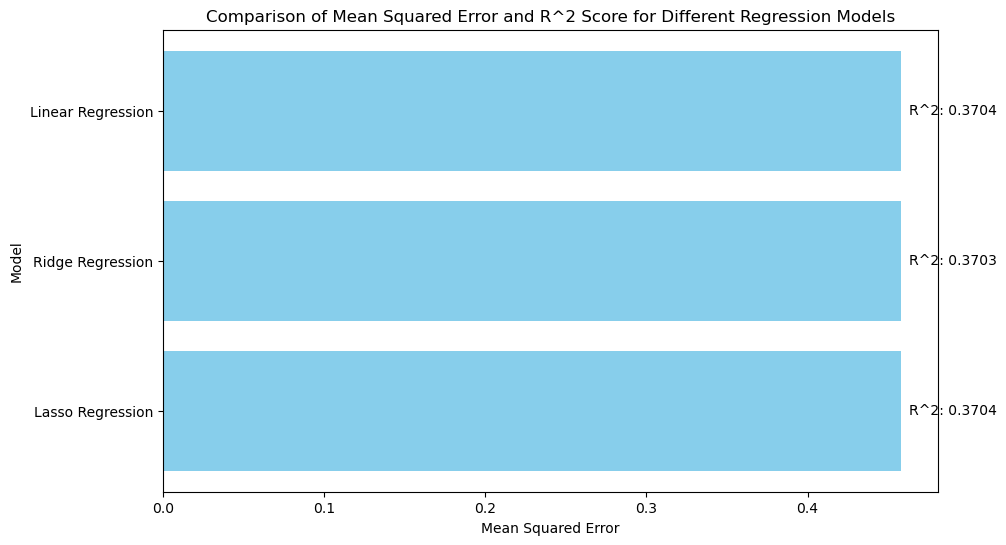

In [157]:
import matplotlib.pyplot as plt
import numpy as np

linear_r2 = 0.3703728395414223
linear_mse = 0.4577912201565928

ridge_r2 = 0.37030029905362476
ridge_mse = 0.4578130191759126

lasso_r2 = 0.3703983361764128
lasso_mse = 0.4577882451728395


labels = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']


r2_scores = [linear_r2, ridge_r2, lasso_r2]
mse_values = [linear_mse, ridge_mse, lasso_mse]


fig, ax = plt.subplots(figsize=(10, 6))

y_pos = np.arange(len(labels))
ax.barh(y_pos, mse_values, color='skyblue')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  

for i in range(len(labels)):
    ax.text(mse_values[i] + 0.005, i, f'R^2: {r2_scores[i]:.4f}', va='center')

plt.xlabel('Mean Squared Error')
plt.ylabel('Model')
plt.title('Comparison of Mean Squared Error and R^2 Score for Different Regression Models')
plt.show()


In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'Mean Squared Error': mse, 'Mean Absolute Error': mae, 'R-squared': r2}


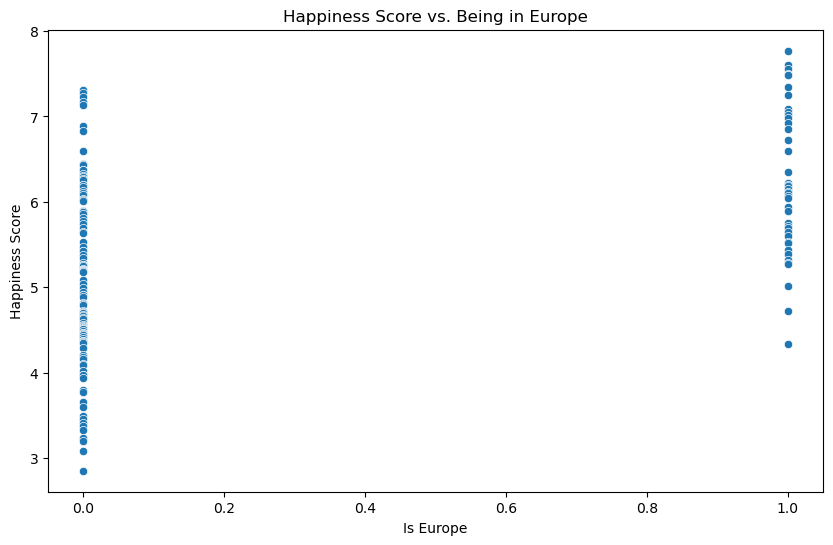

In [70]:
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Is_Europe', y='Score', data=df)
plt.title('Happiness Score vs. Being in Europe')
plt.xlabel('Is Europe')
plt.ylabel('Happiness Score')
plt.show()


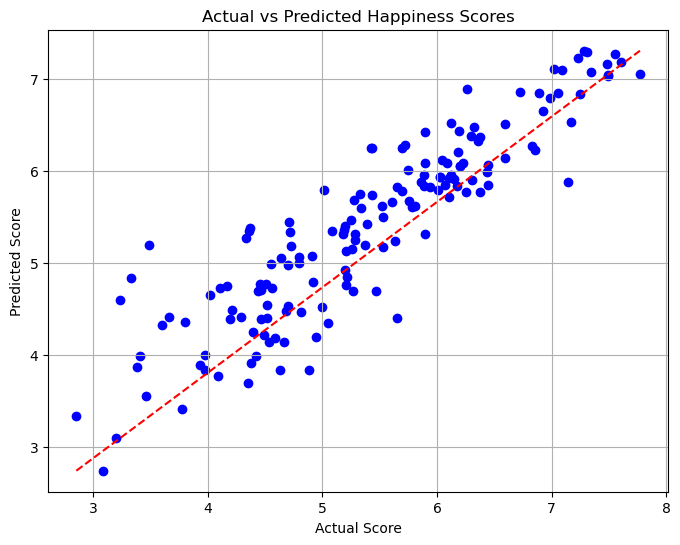

In [72]:
import matplotlib.pyplot as plt


predicted_scores = model.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(y, predicted_scores, color='blue')
plt.plot([y.min(), y.max()], [predicted_scores.min(), predicted_scores.max()], color='red', linestyle='--')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs Predicted Happiness Scores')
plt.grid(True)
plt.show()


/Users/dilagurer/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


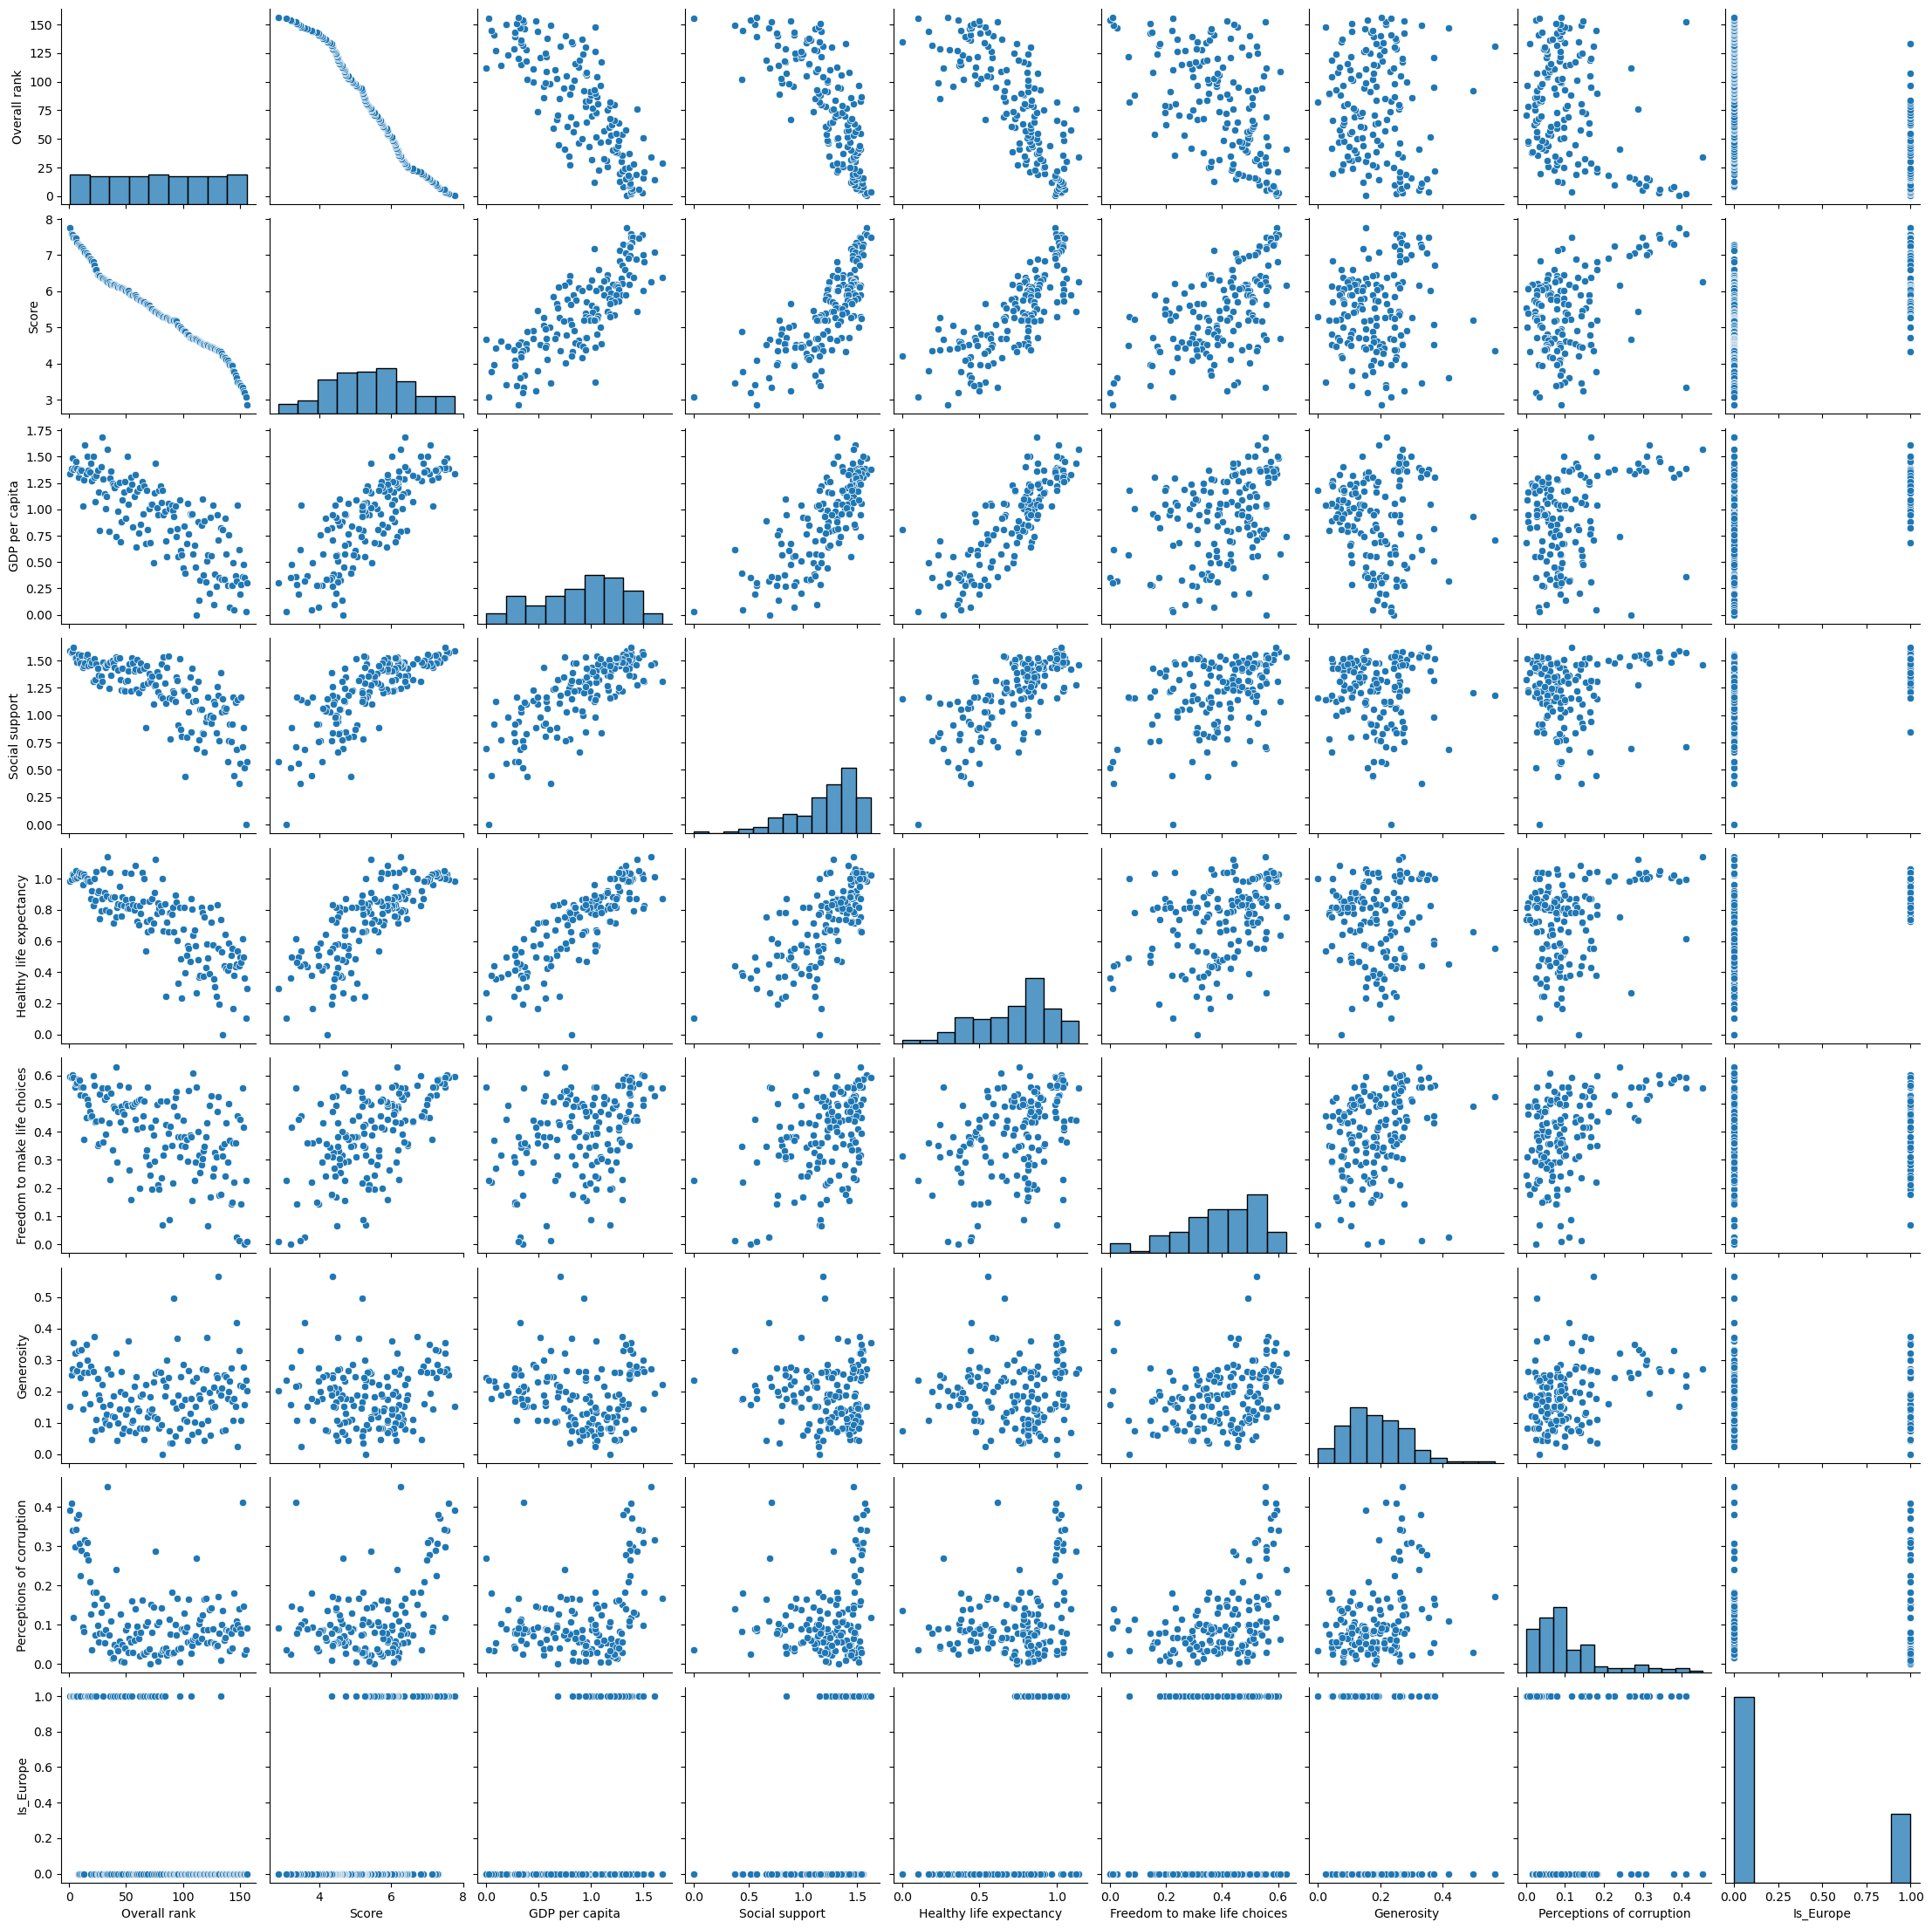

In [26]:

sns.pairplot(df)
plt.show()


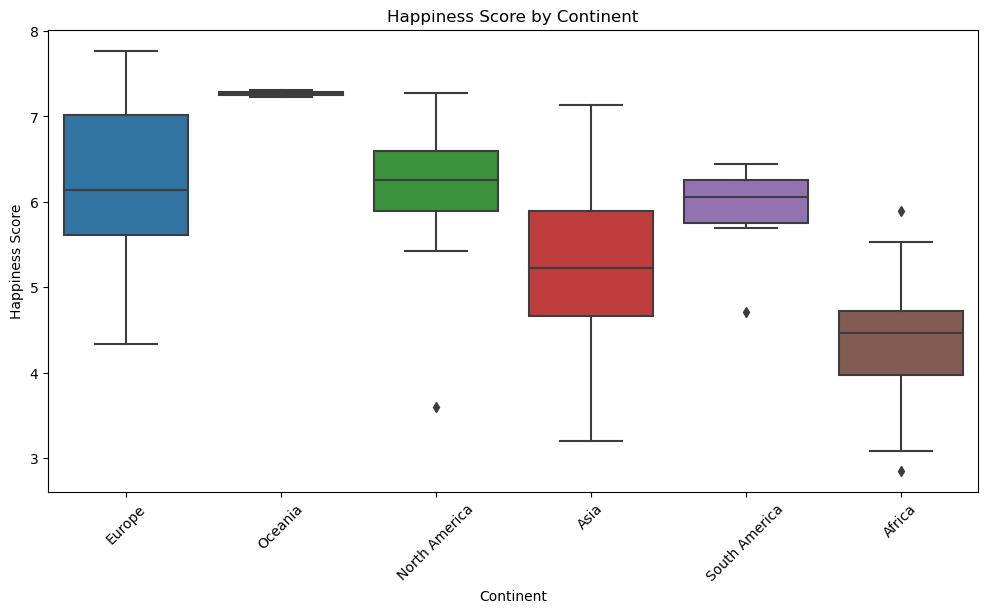

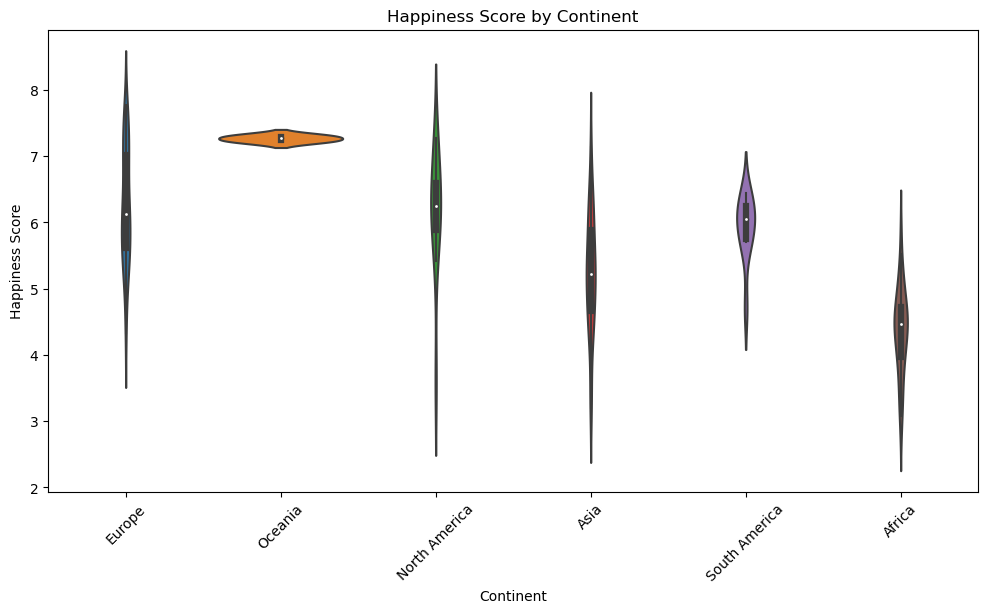

In [27]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='Continent', y='Score', data=df)
plt.title('Happiness Score by Continent')
plt.xlabel('Continent')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(x='Continent', y='Score', data=df)
plt.title('Happiness Score by Continent')
plt.xlabel('Continent')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.show()


In [158]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


file_path = '/Users/dilagurer/Desktop/2019.csv'
df = pd.read_csv(file_path, delimiter=';')


country_to_continent = {
    'Finland': 'Europe', 'Denmark': 'Europe', 'Norway': 'Europe', 'Iceland': 'Europe', 'Netherlands': 'Europe',
    'Switzerland': 'Europe', 'Sweden': 'Europe', 'New Zealand': 'Oceania', 'Canada': 'North America', 'Austria': 'Europe',
    'Australia': 'Oceania', 'Costa Rica': 'North America', 'Israel': 'Asia', 'Luxembourg': 'Europe', 'United Kingdom': 'Europe',
    'Ireland': 'Europe', 'Germany': 'Europe', 'Belgium': 'Europe', 'United States': 'North America', 'Czech Republic': 'Europe',
    'United Arab Emirates': 'Asia', 'Malta': 'Europe', 'Mexico': 'North America', 'France': 'Europe', 'Taiwan': 'Asia',
    'Chile': 'South America', 'Guatemala': 'North America', 'Saudi Arabia': 'Asia', 'Qatar': 'Asia', 'Spain': 'Europe',
    'Panama': 'North America', 'Brazil': 'South America', 'Uruguay': 'South America', 'Singapore': 'Asia', 'El Salvador': 'North America',
    'Italy': 'Europe', 'Bahrain': 'Asia', 'Slovakia': 'Europe', 'Trinidad & Tobago': 'North America', 'Poland': 'Europe',
    'Uzbekistan': 'Asia', 'Lithuania': 'Europe', 'Colombia': 'South America', 'Slovenia': 'Europe', 'Nicaragua': 'North America',
    'Kosovo': 'Europe', 'Argentina': 'South America', 'Romania': 'Europe', 'Cyprus': 'Europe', 'Ecuador': 'South America',
    'Kuwait': 'Asia', 'Thailand': 'Asia', 'Latvia': 'Europe', 'South Korea': 'Asia', 'Estonia': 'Europe', 'Jamaica': 'North America',
    'Mauritius': 'Africa', 'Japan': 'Asia', 'Honduras': 'North America', 'Kazakhstan': 'Asia', 'Bolivia': 'South America',
    'Hungary': 'Europe', 'Paraguay': 'South America', 'Northern Cyprus': 'Europe', 'Peru': 'South America', 'Portugal': 'Europe',
    'Pakistan': 'Asia', 'Russia': 'Europe', 'Philippines': 'Asia', 'Serbia': 'Europe', 'Moldova': 'Europe', 'Libya': 'Africa',
    'Montenegro': 'Europe', 'Tajikistan': 'Asia', 'Croatia': 'Europe', 'Hong Kong': 'Asia', 'Dominican Republic': 'North America',
    'Bosnia and Herzegovina': 'Europe', 'Turkey': 'Asia', 'Malaysia': 'Asia', 'Belarus': 'Europe', 'Greece': 'Europe',
    'Mongolia': 'Asia', 'North Macedonia': 'Europe', 'Nigeria': 'Africa', 'Kyrgyzstan': 'Asia', 'Turkmenistan': 'Asia',
    'Algeria': 'Africa', 'Morocco': 'Africa', 'Azerbaijan': 'Asia', 'Lebanon': 'Asia', 'Indonesia': 'Asia', 'China': 'Asia',
    'Vietnam': 'Asia', 'Bhutan': 'Asia', 'Cameroon': 'Africa', 'Bulgaria': 'Europe', 'Ghana': 'Africa', 'Ivory Coast': 'Africa',
    'Nepal': 'Asia', 'Jordan': 'Asia', 'Benin': 'Africa', 'Congo (Brazzaville)': 'Africa', 'Gabon': 'Africa', 'Laos': 'Asia',
    'South Africa': 'Africa', 'Albania': 'Europe', 'Venezuela': 'South America', 'Cambodia': 'Asia', 'Palestinian Territories': 'Asia',
    'Senegal': 'Africa', 'Somalia': 'Africa', 'Namibia': 'Africa', 'Niger': 'Africa', 'Burkina Faso': 'Africa', 'Armenia': 'Asia',
    'Iran': 'Asia', 'Guinea': 'Africa', 'Georgia': 'Asia', 'Gambia': 'Africa', 'Kenya': 'Africa', 'Mauritania': 'Africa',
    'Mozambique': 'Africa', 'Tunisia': 'Africa', 'Bangladesh': 'Asia', 'Iraq': 'Asia', 'Congo (Kinshasa)': 'Africa', 'Mali': 'Africa',
    'Sierra Leone': 'Africa', 'Sri Lanka': 'Asia', 'Myanmar': 'Asia', 'Chad': 'Africa', 'Ukraine': 'Europe', 'Ethiopia': 'Africa',
    'Swaziland': 'Africa', 'Uganda': 'Africa', 'Egypt': 'Africa', 'Zambia': 'Africa', 'Togo': 'Africa', 'India': 'Asia',
    'Liberia': 'Africa', 'Comoros': 'Africa', 'Madagascar': 'Africa', 'Lesotho': 'Africa', 'Burundi': 'Africa', 'Zimbabwe': 'Africa',
    'Haiti': 'North America', 'Botswana': 'Africa', 'Syria': 'Asia', 'Malawi': 'Africa', 'Yemen': 'Asia', 'Rwanda': 'Africa',
    'Tanzania': 'Africa', 'Afghanistan': 'Asia', 'Central African Republic': 'Africa', 'South Sudan': 'Africa'
}

df['Continent'] = df['Country or region'].map(country_to_continent)


df['Is_Europe'] = df['Continent'].apply(lambda x: 1 if x == 'Europe' else 0)


cols_with_missing_values = ['GDP per capita', 'Social support', 'Healthy life expectancy',
                            'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']

imputer = SimpleImputer(strategy='mean')
df[cols_with_missing_values] = imputer.fit_transform(df[cols_with_missing_values])


X = df[['Is_Europe']]
y = df['Score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)


forest_model = RandomForestRegressor(random_state=42)


forest_model.fit(X_train, y_train)

y_pred = forest_model.predict(X_test)


r2 = r2_score(y_test, y_pred)
print("R^2 Score on Testing Set (Random Forest):", r2)


feature_importance = forest_model.feature_importances_[0]


print("Feature Importance (Is_Europe):", feature_importance)


R^2 Score on Testing Set (Random Forest): 0.17579930048754733
Feature Importance (Is_Europe): 1.0


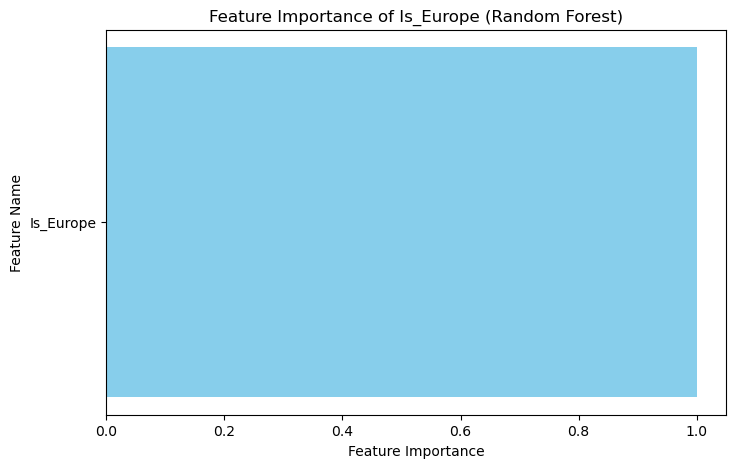

In [159]:
import matplotlib.pyplot as plt


feature_names = ['Is_Europe']


feature_importance = [feature_importance]


plt.figure(figsize=(8, 5))
plt.barh(feature_names, feature_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance of Is_Europe (Random Forest)')
plt.show()


In [31]:

print(world.columns)


Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


In [32]:
world = world.merge(df, how='left', left_on='ADMIN', right_on='Country or region')


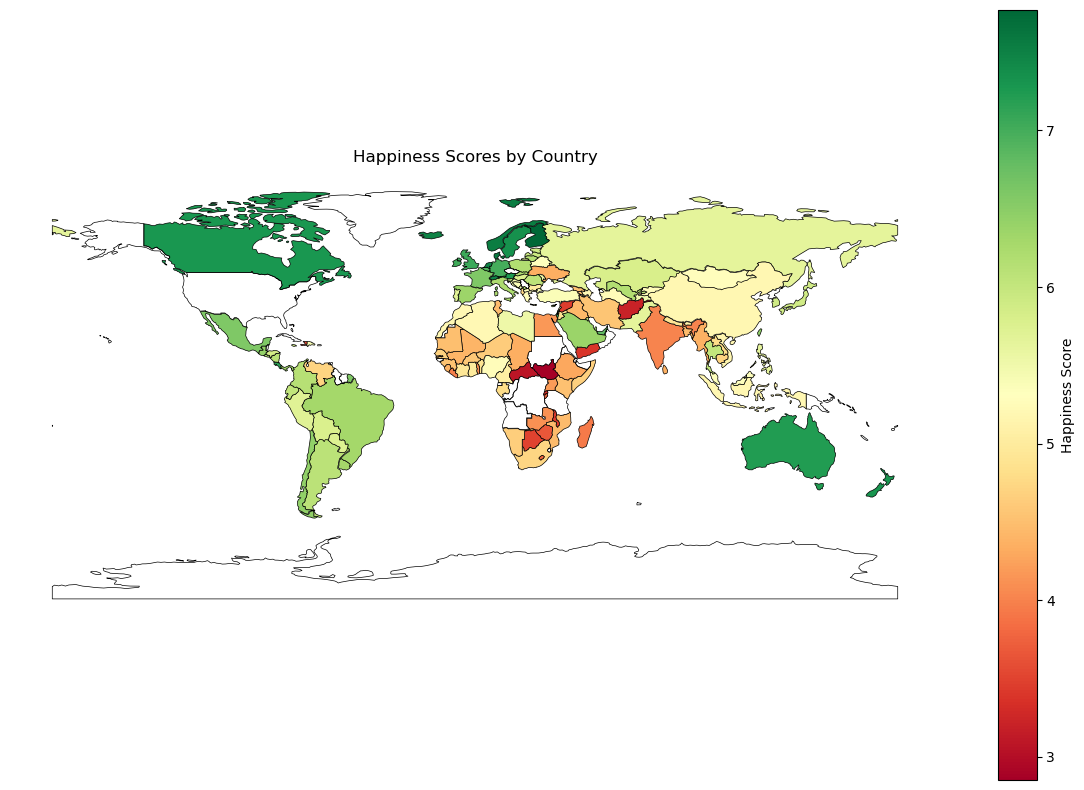

In [35]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable


file_path = '/Users/dilagurer/Desktop/ne_110m_admin_0_countries'
world = gpd.read_file(file_path)


world = world.merge(df, how='left', left_on='ADMIN', right_on='Country or region')


fig, ax = plt.subplots(1, 1, figsize=(15, 10))


cmap = plt.cm.RdYlGn


norm = Normalize(vmin=world['Score'].min(), vmax=world['Score'].max())


for _, country in world.iterrows():
    color = cmap(norm(country['Score']))
    gpd.GeoSeries(country['geometry']).plot(ax=ax, linewidth=0.5, edgecolor='black', color=color)


sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Happiness Score')


plt.title('Happiness Scores by Country')


ax.set_axis_off()


plt.show()


In [160]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


file_path = '/Users/dilagurer/Desktop/2019.csv'
df = pd.read_csv(file_path, delimiter=';')


cols_with_missing_values = ['GDP per capita', 'Social support', 'Healthy life expectancy',
                            'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']
imputer = SimpleImputer(strategy='mean')
df[cols_with_missing_values] = imputer.fit_transform(df[cols_with_missing_values])


country_to_continent = {
    'Finland': 'Europe', 'Denmark': 'Europe', 'Norway': 'Europe', 'Iceland': 'Europe', 'Netherlands': 'Europe',
    'Switzerland': 'Europe', 'Sweden': 'Europe', 'New Zealand': 'Oceania', 'Canada': 'North America', 'Austria': 'Europe',
    'Australia': 'Oceania', 'Costa Rica': 'North America', 'Israel': 'Asia', 'Luxembourg': 'Europe', 'United Kingdom': 'Europe',
    'Ireland': 'Europe', 'Germany': 'Europe', 'Belgium': 'Europe', 'United States': 'North America', 'Czech Republic': 'Europe',
    'United Arab Emirates': 'Asia', 'Malta': 'Europe', 'Mexico': 'North America', 'France': 'Europe', 'Taiwan': 'Asia',
    'Chile': 'South America', 'Guatemala': 'North America', 'Saudi Arabia': 'Asia', 'Qatar': 'Asia', 'Spain': 'Europe',
    'Panama': 'North America', 'Brazil': 'South America', 'Uruguay': 'South America', 'Singapore': 'Asia', 'El Salvador': 'North America',
    'Italy': 'Europe', 'Bahrain': 'Asia', 'Slovakia': 'Europe', 'Trinidad & Tobago': 'North America', 'Poland': 'Europe',
    'Uzbekistan': 'Asia', 'Lithuania': 'Europe', 'Colombia': 'South America', 'Slovenia': 'Europe', 'Nicaragua': 'North America',
    'Kosovo': 'Europe', 'Argentina': 'South America', 'Romania': 'Europe', 'Cyprus': 'Europe', 'Ecuador': 'South America',
    'Kuwait': 'Asia', 'Thailand': 'Asia', 'Latvia': 'Europe', 'South Korea': 'Asia', 'Estonia': 'Europe', 'Jamaica': 'North America',
    'Mauritius': 'Africa', 'Japan': 'Asia', 'Honduras': 'North America', 'Kazakhstan': 'Asia', 'Bolivia': 'South America',
    'Hungary': 'Europe', 'Paraguay': 'South America', 'Northern Cyprus': 'Europe', 'Peru': 'South America', 'Portugal': 'Europe',
    'Pakistan': 'Asia', 'Russia': 'Europe', 'Philippines': 'Asia', 'Serbia': 'Europe', 'Moldova': 'Europe', 'Libya': 'Africa',
    'Montenegro': 'Europe', 'Tajikistan': 'Asia', 'Croatia': 'Europe', 'Hong Kong': 'Asia', 'Dominican Republic': 'North America',
    'Bosnia and Herzegovina': 'Europe', 'Turkey': 'Asia', 'Malaysia': 'Asia', 'Belarus': 'Europe', 'Greece': 'Europe',
    'Mongolia': 'Asia', 'North Macedonia': 'Europe', 'Nigeria': 'Africa', 'Kyrgyzstan': 'Asia', 'Turkmenistan': 'Asia',
    'Algeria': 'Africa', 'Morocco': 'Africa', 'Azerbaijan': 'Asia', 'Lebanon': 'Asia', 'Indonesia': 'Asia', 'China': 'Asia',
    'Vietnam': 'Asia', 'Bhutan': 'Asia', 'Cameroon': 'Africa', 'Bulgaria': 'Europe', 'Ghana': 'Africa', 'Ivory Coast': 'Africa',
    'Nepal': 'Asia', 'Jordan': 'Asia', 'Benin': 'Africa', 'Congo (Brazzaville)': 'Africa', 'Gabon': 'Africa', 'Laos': 'Asia',
    'South Africa': 'Africa', 'Albania': 'Europe', 'Venezuela': 'South America', 'Cambodia': 'Asia', 'Palestinian Territories': 'Asia',
    'Senegal': 'Africa', 'Somalia': 'Africa', 'Namibia': 'Africa', 'Niger': 'Africa', 'Burkina Faso': 'Africa', 'Armenia': 'Asia',
    'Iran': 'Asia', 'Guinea': 'Africa', 'Georgia': 'Asia', 'Gambia': 'Africa', 'Kenya': 'Africa', 'Mauritania': 'Africa',
    'Mozambique': 'Africa', 'Tunisia': 'Africa', 'Bangladesh': 'Asia', 'Iraq': 'Asia', 'Congo (Kinshasa)': 'Africa', 'Mali': 'Africa',
    'Sierra Leone': 'Africa', 'Sri Lanka': 'Asia', 'Myanmar': 'Asia', 'Chad': 'Africa', 'Ukraine': 'Europe', 'Ethiopia': 'Africa',
    'Swaziland': 'Africa', 'Uganda': 'Africa', 'Egypt': 'Africa', 'Zambia': 'Africa', 'Togo': 'Africa', 'India': 'Asia',
    'Liberia': 'Africa', 'Comoros': 'Africa', 'Madagascar': 'Africa', 'Lesotho': 'Africa', 'Burundi': 'Africa', 'Zimbabwe': 'Africa',
    'Haiti': 'North America', 'Botswana': 'Africa', 'Syria': 'Asia', 'Malawi': 'Africa', 'Yemen': 'Asia', 'Rwanda': 'Africa',
    'Tanzania': 'Africa', 'Afghanistan': 'Asia', 'Central African Republic': 'Africa', 'South Sudan': 'Africa'
}


df['Continent'] = df['Country or region'].map(country_to_continent)


df['Is_Europe'] = df['Continent'].apply(lambda x: 1 if x == 'Europe' else 0)


additional_predictors = ['GDP per capita', 'Social support', 'Healthy life expectancy',
                         'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']


X = df[['Is_Europe'] + additional_predictors]


y = df['Score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)


model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


coefficients = model.coef_


for i, predictor in enumerate(['Is_Europe'] + additional_predictors):
    print(f"Coefficient of {predictor}:", coefficients[i])


Mean Squared Error (MSE): 0.38041227086962087
Root Mean Squared Error (RMSE): 0.6167757054794075
R² Score: 0.7607473590314962
Coefficient of Is_Europe: 0.23540731665880985
Coefficient of GDP per capita: 0.7083550339710856
Coefficient of Social support: 1.0785913651072891
Coefficient of Healthy life expectancy: 0.9508426954623314
Coefficient of Freedom to make life choices: 1.6156442736882448
Coefficient of Perceptions of corruption: 0.2811869157470659
Coefficient of Generosity: 0.5871626032326751


Lasso Regression:
Mean Squared Error (MSE): 0.4263051085060912
R² Score: 0.731883982513793

Ridge Regression:
Mean Squared Error (MSE): 0.40252136125019444
R² Score: 0.7468422916400803


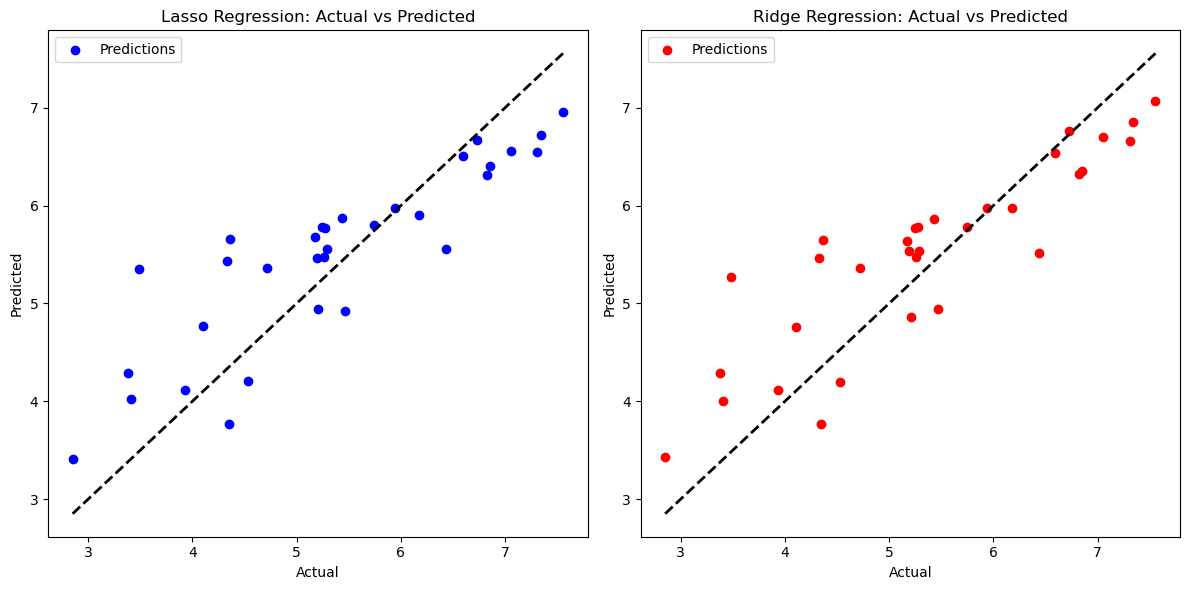

In [161]:
from sklearn.linear_model import Lasso, Ridge


lasso_model = Lasso(alpha=0.01) 

lasso_model.fit(X_train, y_train)


y_pred_lasso = lasso_model.predict(X_test)


mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression:")
print("Mean Squared Error (MSE):", mse_lasso)
print("R² Score:", r2_lasso)


ridge_model = Ridge(alpha=1) 


ridge_model.fit(X_train, y_train)


y_pred_ridge = ridge_model.predict(X_test)


mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression:")
print("Mean Squared Error (MSE):", mse_ridge)
print("R² Score:", r2_ridge)


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lasso, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso Regression: Actual vs Predicted')
plt.legend()


plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ridge, color='red', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()


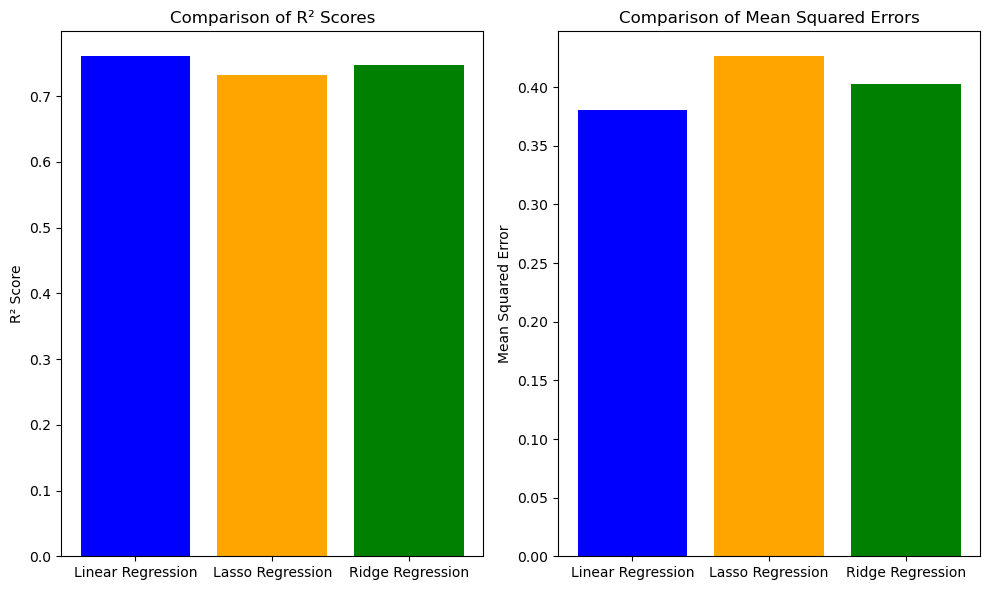

In [162]:

models = {
    "Linear Regression": model,
    "Lasso Regression": lasso_model,
    "Ridge Regression": ridge_model
}


r2_scores = []
mean_squared_errors = []

for name, model in models.items():
   
    y_pred = model.predict(X_test)
   
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
   
    r2_scores.append(r2)
    mean_squared_errors.append(mse)


plt.figure(figsize=(10, 6))


plt.subplot(1, 2, 1)
plt.bar(models.keys(), r2_scores, color=['blue', 'orange', 'green'])
plt.ylabel('R² Score')
plt.title('Comparison of R² Scores')


plt.subplot(1, 2, 2)
plt.bar(models.keys(), mean_squared_errors, color=['blue', 'orange', 'green'])
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Errors')

plt.tight_layout()
plt.show()


R^2 Score on Testing Set (Random Forest with multiple variables): 0.7474060993836442
Feature Importances: [0.00204356 0.12089449 0.48371644 0.24985969 0.06996415 0.0464603
 0.02706136]


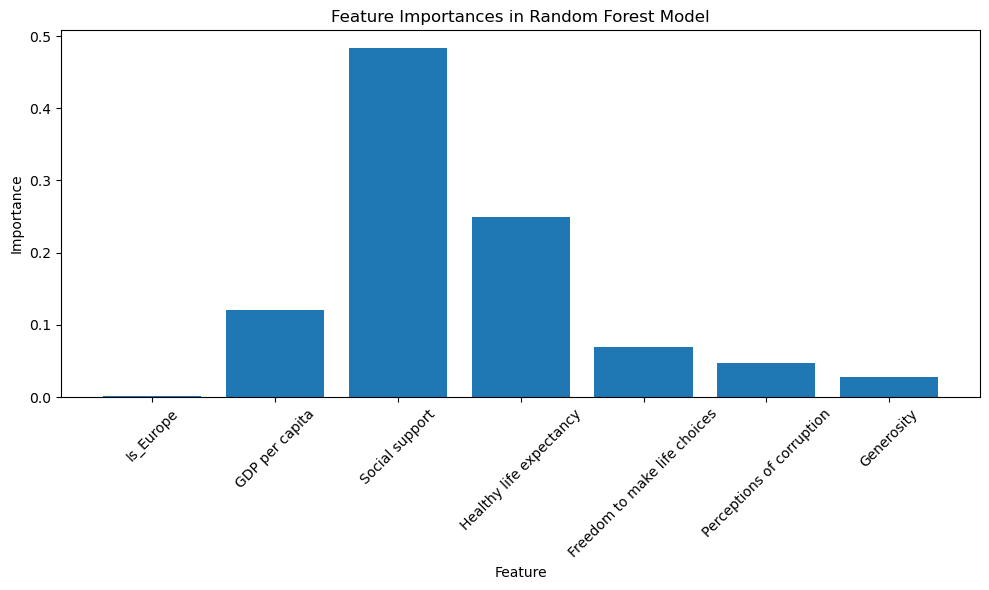

Mean Squared Error: 0.40162490559062575


In [167]:

X = df[['Is_Europe', 'GDP per capita', 'Social support', 'Healthy life expectancy',
        'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']]
y = df['Score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

forest_model = RandomForestRegressor(random_state=42)

forest_model.fit(X_train, y_train)


y_pred = forest_model.predict(X_test)


r2 = r2_score(y_test, y_pred)
print("R^2 Score on Testing Set (Random Forest with multiple variables):", r2)


feature_importances = forest_model.feature_importances_
print("Feature Importances:", feature_importances)


plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
